
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

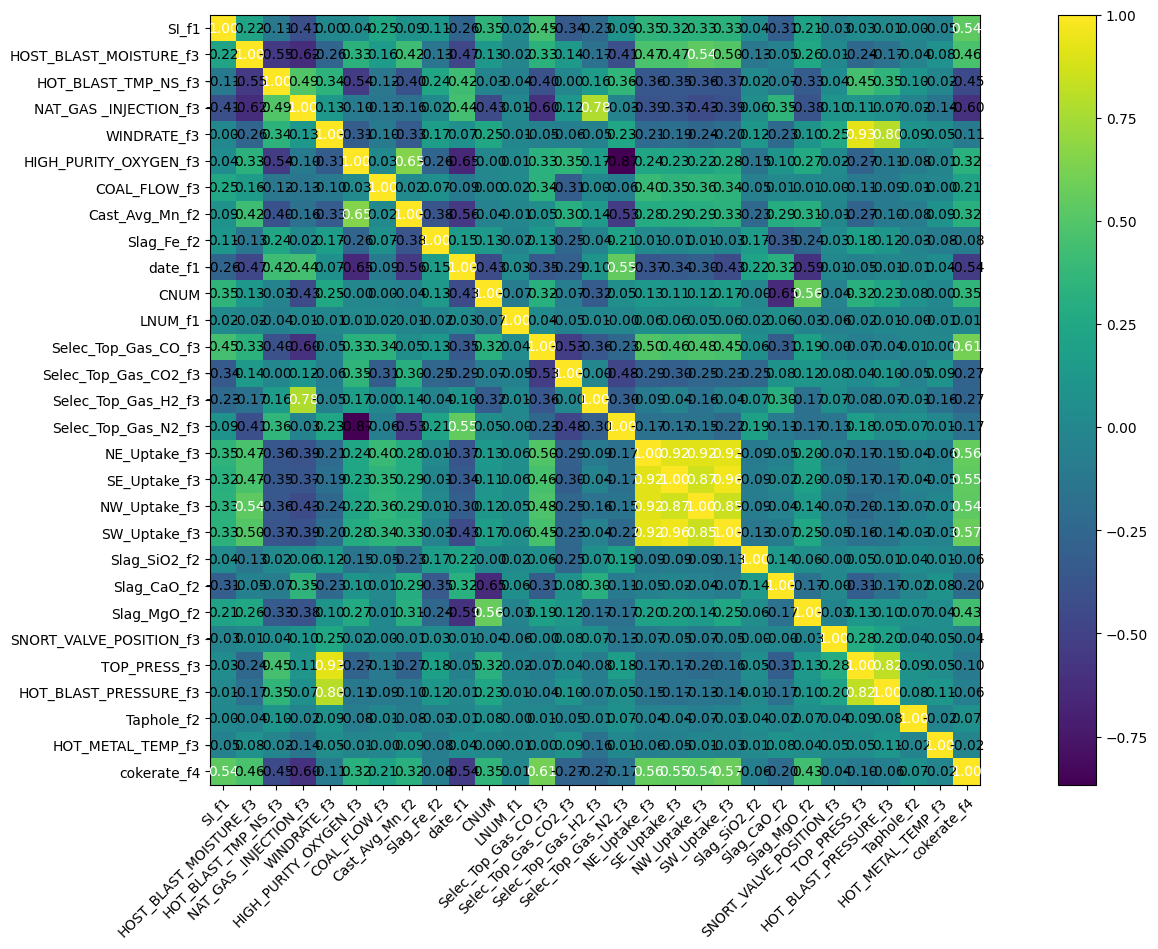

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

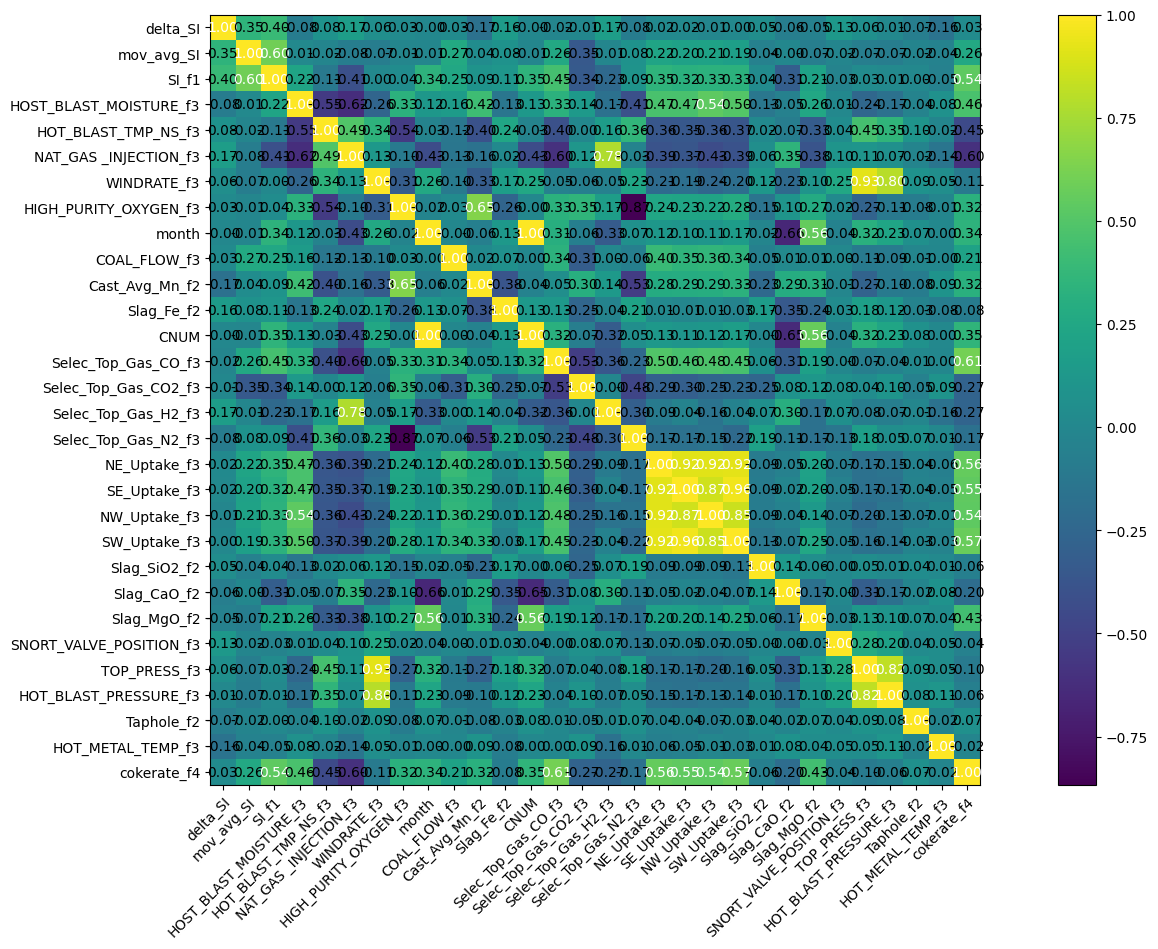

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.337399
Loss_SI: 0.2643072009086609 Loss_all: 0.9952237010002136
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.095736
Loss_SI: 0.04227513074874878 Loss_all: 0.5768828392028809
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.061978
Loss_SI: 0.01623322069644928 Loss_all: 0.47368502616882324
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050095
Loss_SI: 0.0145209189504385 Loss_all: 0.3702627420425415
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.044395
Loss_SI: 0.007940173149108887 Loss_all: 0.37248483300209045
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039420
Loss_SI: 0.008962604217231274 Loss_all: 0.3135318458080292
Prediction shape: torch.Size([32, 35])
===


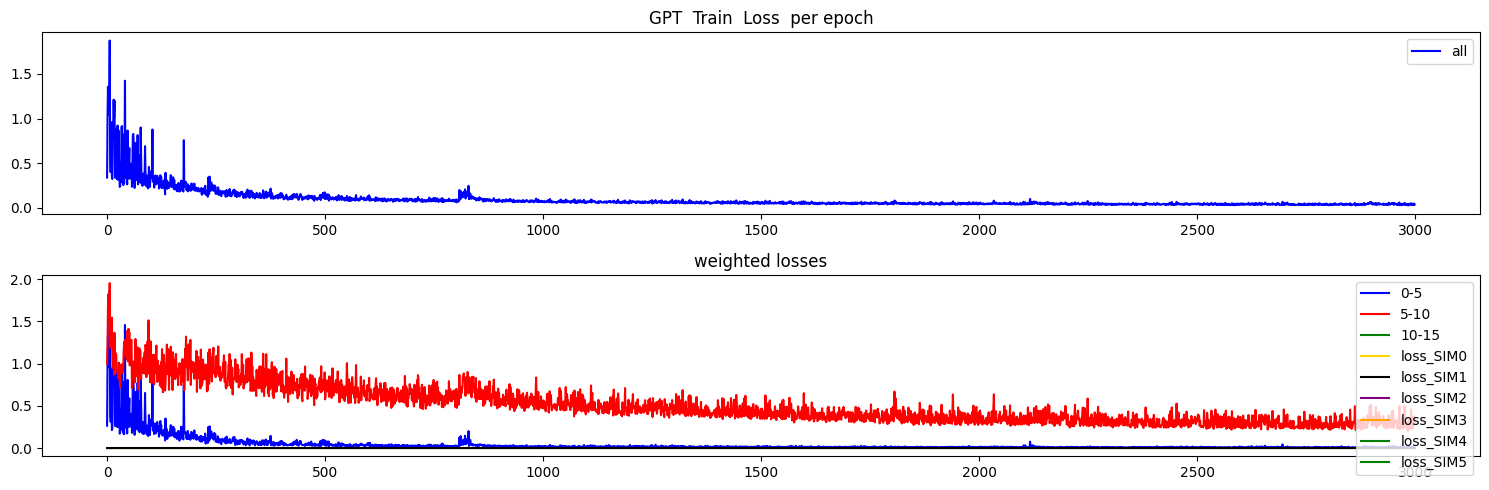

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


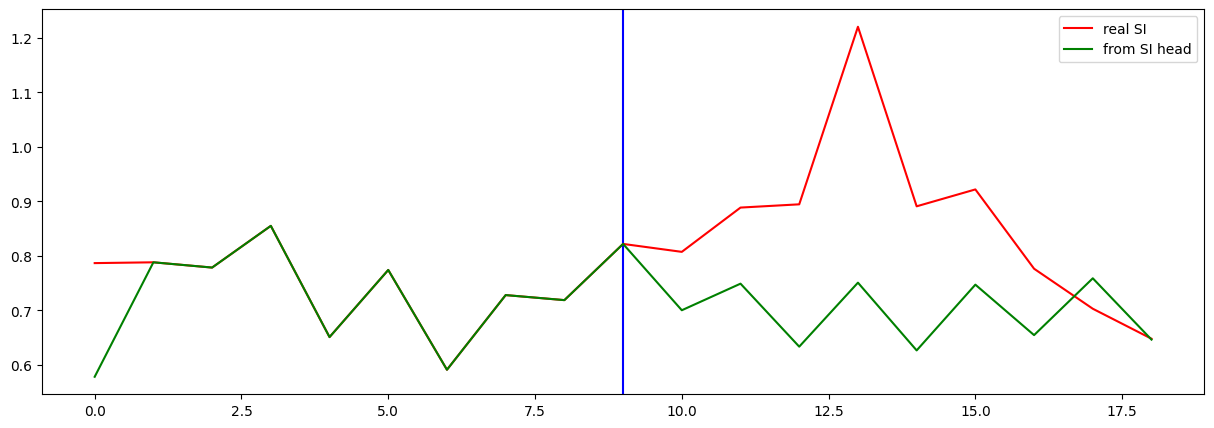

Testing R**2 - (all) - (no inputs):  0.9872420960299069
Testing R**2 - (f2) - SI full (no inputs):  -1.6609104577834892
Testing R**2 - SI head only (no inputs):  -1.4850141487122488
0 ...index R**2 (no inputs):  -1.8283191719470486
1 ...index R**2 (no inputs):  -0.577847866787335
2 ...index R**2 (no inputs):  -1.6609104577834892
3 ...index R**2 (no inputs):  -68.42623331479213
4 ...index R**2 (no inputs):  -1.7981559937422462
5 ...index R**2 (no inputs):  -0.8055236892700197
6 ...index R**2 (no inputs):  -3.476844050369184
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.33270752543593984
10 ...index R**2 (no inputs):  -0.5935354061256077
11 ...index R**2 (no inputs):  -15.626109281571349
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.4374835048592134
16 ...index R**2 (no inputs):  -0.020182107846938857
17 ...index R**2 (no inputs):  -8.60550490

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.377208
Loss_SI: 1.350744605064392 Loss_all: 1.615379810333252
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.133237
Loss_SI: 0.07988516241312027 Loss_all: 0.6134058237075806
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.090590
Loss_SI: 0.03933173418045044 Loss_all: 0.551912248134613
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.063172
Loss_SI: 0.013071287423372269 Loss_all: 0.5140781402587891
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.087827
Loss_SI: 0.0316309779882431 Loss_all: 0.5935947299003601
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.042808
Loss_SI: 0.01086759939789772 Loss_all: 0.3302723467350006
Prediction shape: torch.Size([32, 35])
===


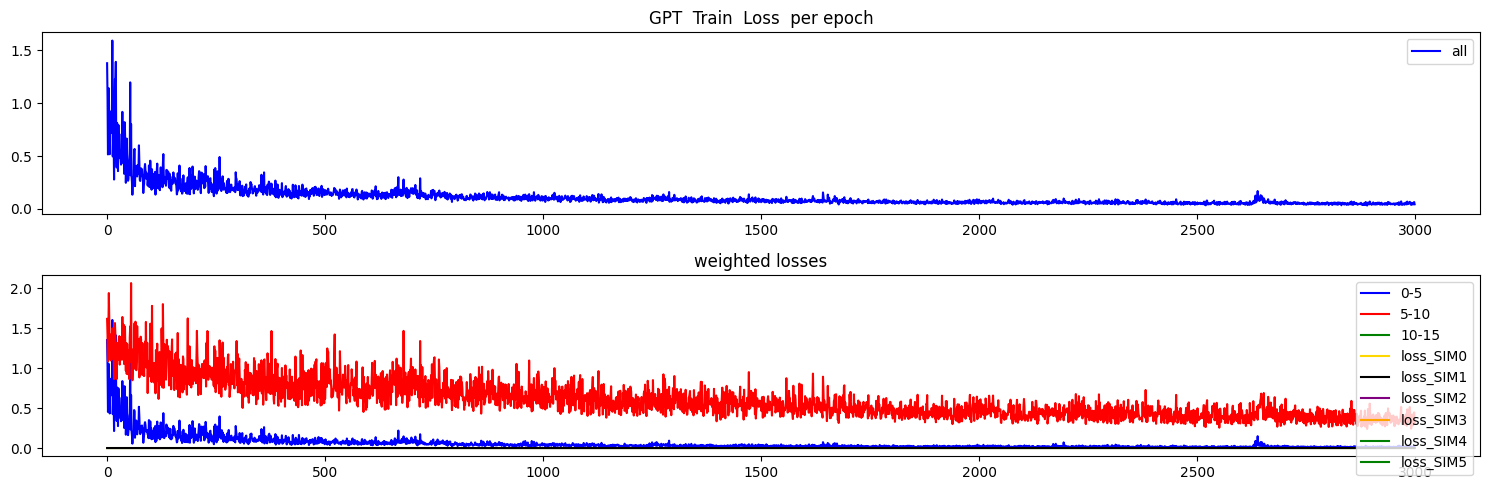

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


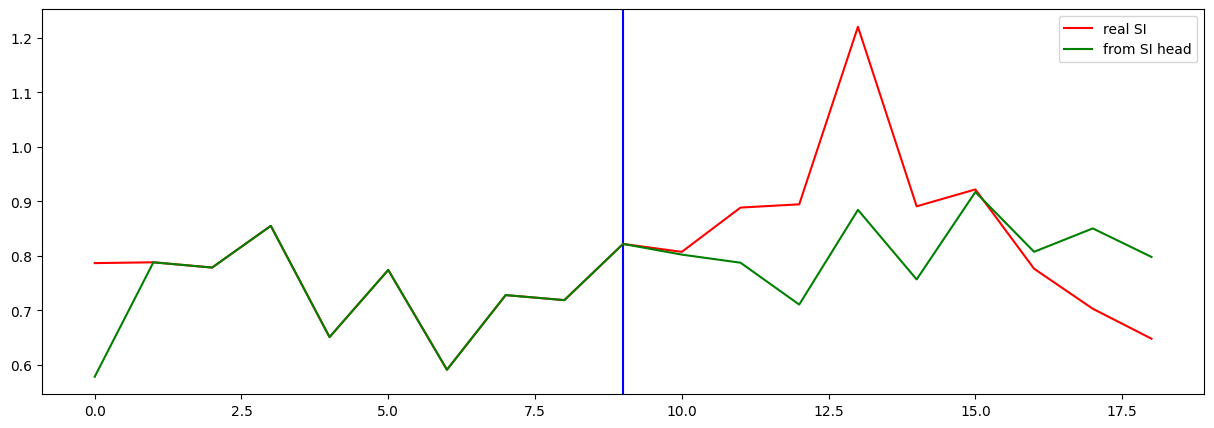

Testing R**2 - (all) - (no inputs):  0.9894084714055568
Testing R**2 - (f2) - SI full (no inputs):  -4.373231990995677
Testing R**2 - SI head only (no inputs):  -0.7285689875472849
0 ...index R**2 (no inputs):  -1.7274629409141196
1 ...index R**2 (no inputs):  -0.9908000502184482
2 ...index R**2 (no inputs):  -4.373231990995677
3 ...index R**2 (no inputs):  -179.5628080009251
4 ...index R**2 (no inputs):  -12.49628948744521
5 ...index R**2 (no inputs):  -0.49247642417432
6 ...index R**2 (no inputs):  -15.748155310088048
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.03155570039916156
10 ...index R**2 (no inputs):  0.21454361812257483
11 ...index R**2 (no inputs):  -35.526318081115456
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5075855806880158
16 ...index R**2 (no inputs):  -0.3598301032133224
17 ...index R**2 (no inputs):  -410.3445477745

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.419969
Loss_SI: 0.34013819694519043 Loss_all: 1.1384437084197998
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.180576
Loss_SI: 0.13360550999641418 Loss_all: 0.6033129096031189
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.143000
Loss_SI: 0.07132762670516968 Loss_all: 0.788053572177887
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.105481
Loss_SI: 0.05809730663895607 Loss_all: 0.5319388508796692
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.099888
Loss_SI: 0.04501809924840927 Loss_all: 0.5937157869338989
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.063353
Loss_SI: 0.018638255074620247 Loss_all: 0.46579039096832275
Prediction shape: torch.Size([32, 35])
===


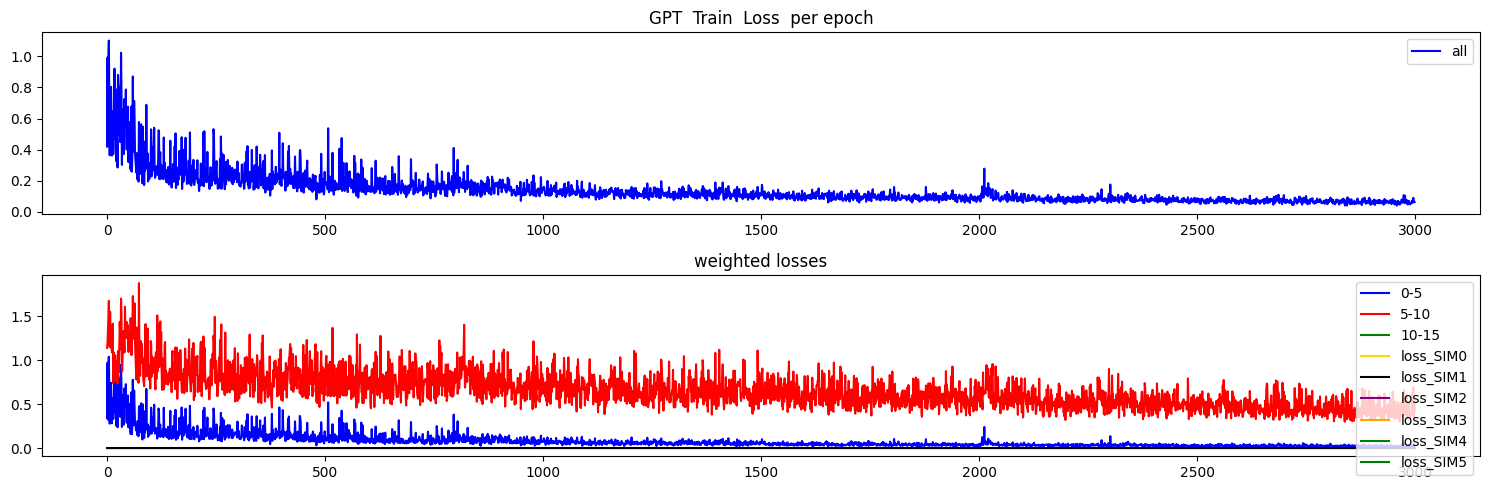

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


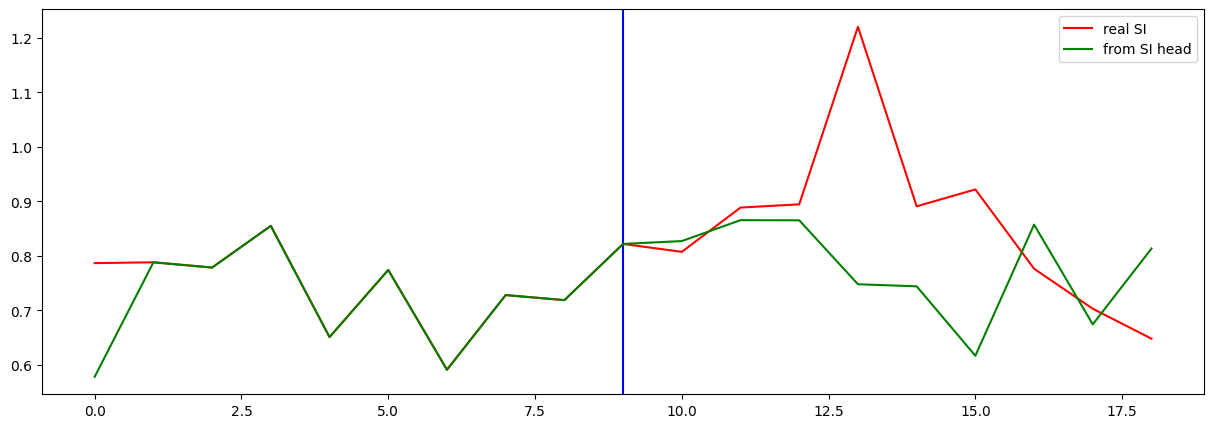

Testing R**2 - (all) - (no inputs):  0.9914587158807328
Testing R**2 - (f2) - SI full (no inputs):  0.26701609430553763
Testing R**2 - SI head only (no inputs):  -0.06817613509278098
0 ...index R**2 (no inputs):  0.009846356950628299
1 ...index R**2 (no inputs):  -4.015209178081269
2 ...index R**2 (no inputs):  0.26701609430553763
3 ...index R**2 (no inputs):  -1154.1319626224008
4 ...index R**2 (no inputs):  -0.6037489248417542
5 ...index R**2 (no inputs):  -0.20471488992650033
6 ...index R**2 (no inputs):  -157.46380531052225
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.21137238199553465
10 ...index R**2 (no inputs):  -0.3856368522754956
11 ...index R**2 (no inputs):  -43.280751053702105
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4274047905777649
16 ...index R**2 (no inputs):  -0.4229577559082993
17 ...index R**2 (no inputs):  -190.27

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.918858
Loss_SI: 0.8627068996429443 Loss_all: 1.4242173433303833
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.183876
Loss_SI: 0.13541771471500397 Loss_all: 0.6199974417686462
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.220343
Loss_SI: 0.16190117597579956 Loss_all: 0.7463179230690002
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.125582
Loss_SI: 0.07904227077960968 Loss_all: 0.5444443821907043
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.099335
Loss_SI: 0.047074269503355026 Loss_all: 0.5696806907653809
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.102901
Loss_SI: 0.05723438039422035 Loss_all: 0.5139032006263733
Prediction shape: torch.Size([32, 35])
===


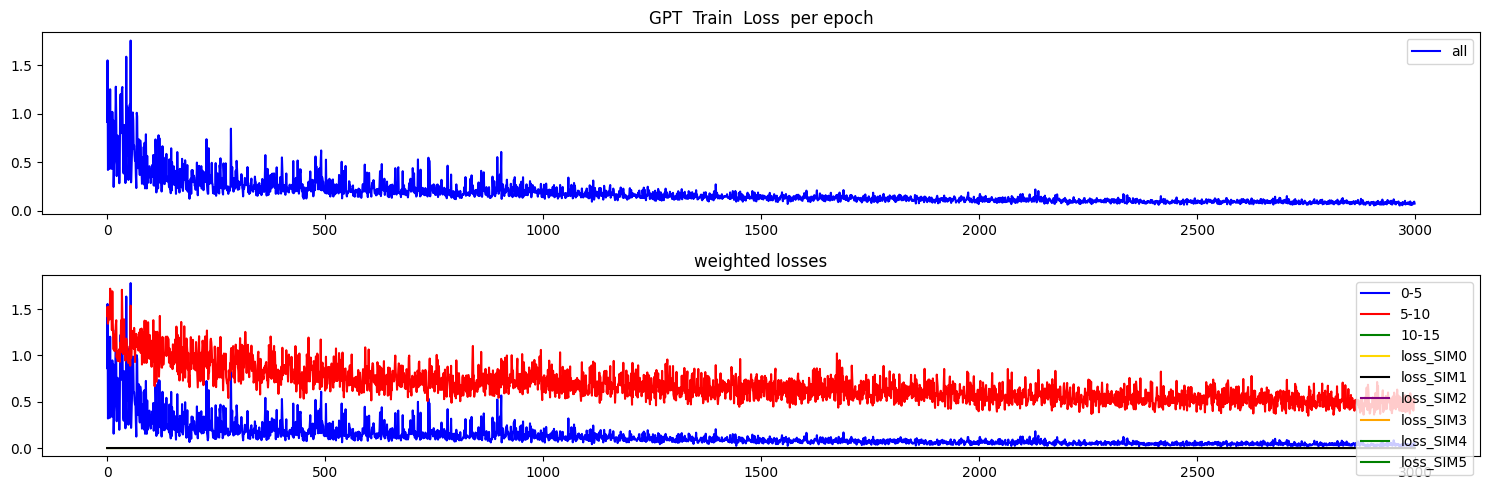

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


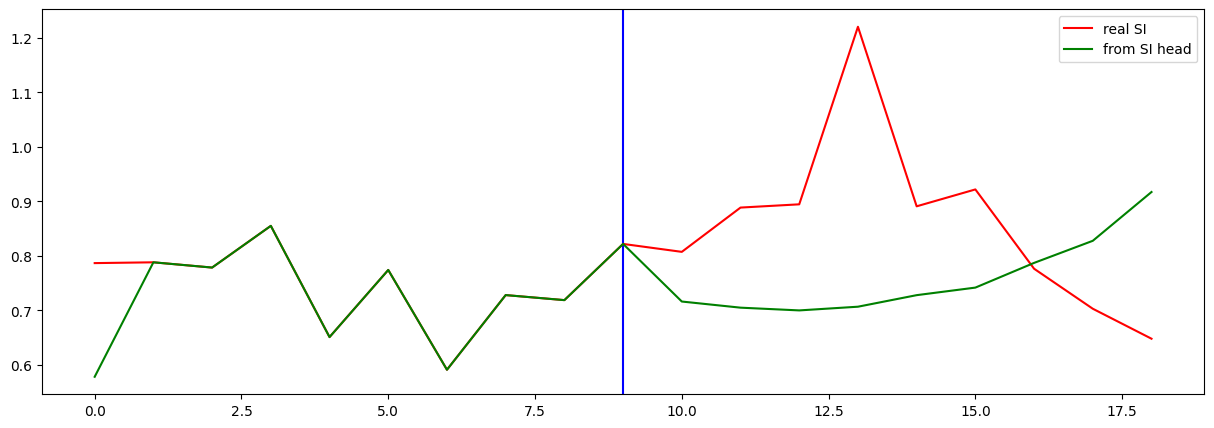

Testing R**2 - (all) - (no inputs):  0.9878335816570293
Testing R**2 - (f2) - SI full (no inputs):  -0.7606547488400015
Testing R**2 - SI head only (no inputs):  -1.1301663061797753
0 ...index R**2 (no inputs):  -0.22912740547969102
1 ...index R**2 (no inputs):  -3.531240329184202
2 ...index R**2 (no inputs):  -0.7606547488400015
3 ...index R**2 (no inputs):  -466.0051098260303
4 ...index R**2 (no inputs):  -5.003743649125176
5 ...index R**2 (no inputs):  -0.720173315473503
6 ...index R**2 (no inputs):  -182.18612118394114
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.004715934309414083
10 ...index R**2 (no inputs):  -0.07062030841017575
11 ...index R**2 (no inputs):  -9.683906036375554
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.2992595263769697
16 ...index R**2 (no inputs):  -2.716869637493464
17 ...index R**2 (no inputs):  -199.6816812

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.572750
Loss_SI: 0.5095746517181396 Loss_all: 1.1413322687149048
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.132392
Loss_SI: 0.07041613757610321 Loss_all: 0.690172553062439
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.075305
Loss_SI: 0.02648017928004265 Loss_all: 0.5147257447242737
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.058910
Loss_SI: 0.016719359904527664 Loss_all: 0.43862730264663696
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.042432
Loss_SI: 0.0061616962775588036 Loss_all: 0.3688632547855377
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.045748
Loss_SI: 0.01416914351284504 Loss_all: 0.3299538195133209
Prediction shape: torch.Size([32, 35])
===


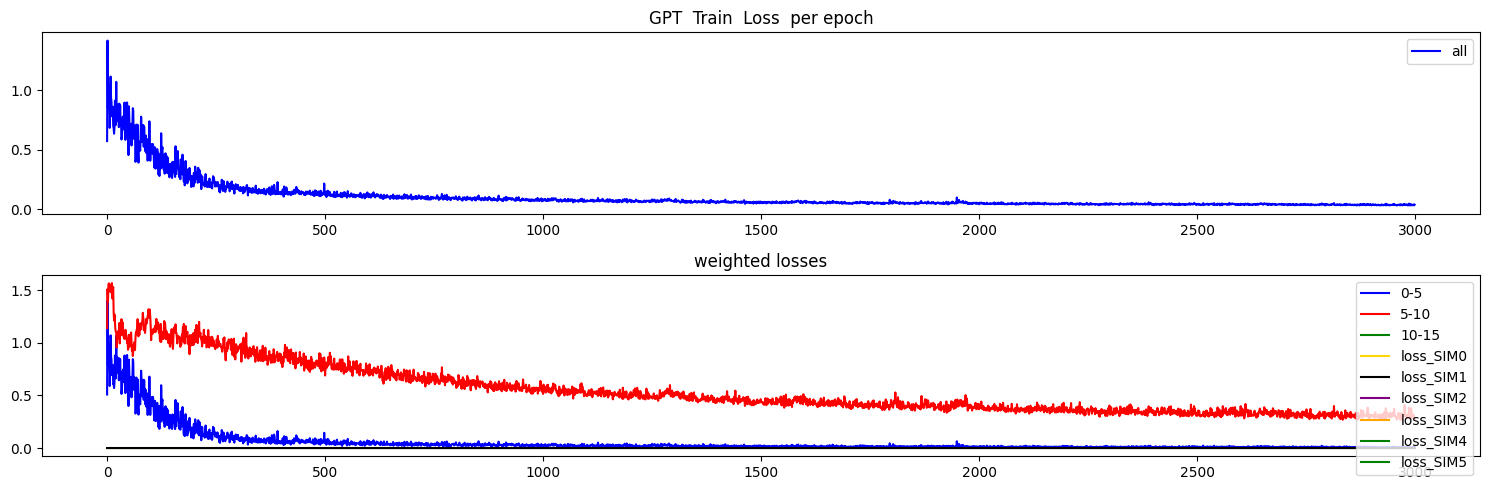

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


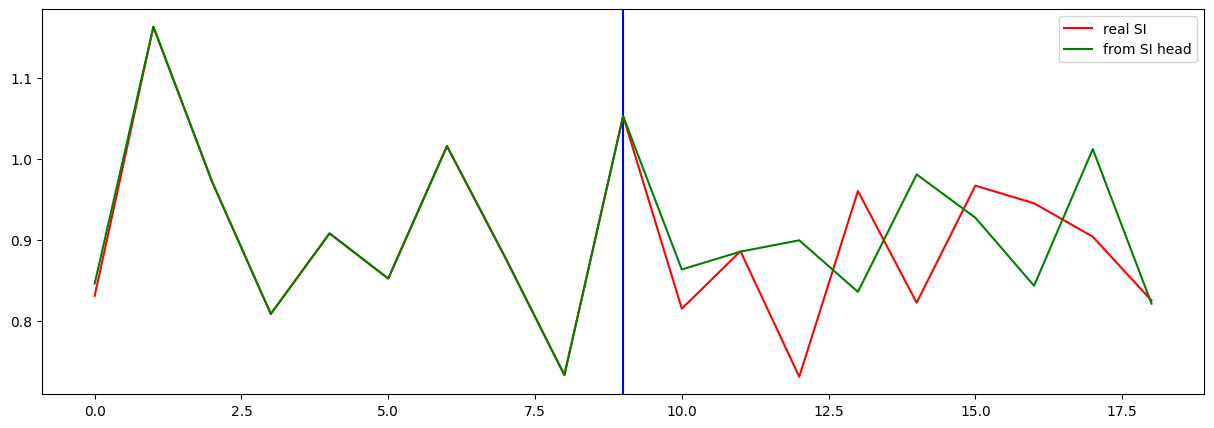

Testing R**2 - (all) - (no inputs):  0.9981620418347584
Testing R**2 - (f2) - SI full (no inputs):  -0.4268631527175819
Testing R**2 - SI head only (no inputs):  -0.36211380378876523
0 ...index R**2 (no inputs):  -1.6881497706180078
1 ...index R**2 (no inputs):  0.673099982645221
2 ...index R**2 (no inputs):  -0.4268631527175819
3 ...index R**2 (no inputs):  -25.805075798787023
4 ...index R**2 (no inputs):  -10.550468332403517
5 ...index R**2 (no inputs):  -2.5020264920836657
6 ...index R**2 (no inputs):  -249.42496360915285
7 ...index R**2 (no inputs):  -1.8206384350176368
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.11459663730466896
10 ...index R**2 (no inputs):  -1.1512796762299242
11 ...index R**2 (no inputs):  -83.78362921206232
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.110950899522472
16 ...index R**2 (no inputs):  -3.623291046708805
17 ...index R**2 (no inputs

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.788699
Loss_SI: 0.7380056977272034 Loss_all: 1.2449356317520142
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.215386
Loss_SI: 0.14758366346359253 Loss_all: 0.8256027698516846
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.126636
Loss_SI: 0.07383450865745544 Loss_all: 0.601850152015686
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.103410
Loss_SI: 0.0463964007794857 Loss_all: 0.6165315508842468
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.069868
Loss_SI: 0.03006981499493122 Loss_all: 0.4280540943145752
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.066134
Loss_SI: 0.028304683044552803 Loss_all: 0.4066026508808136
Prediction shape: torch.Size([32, 35])
===


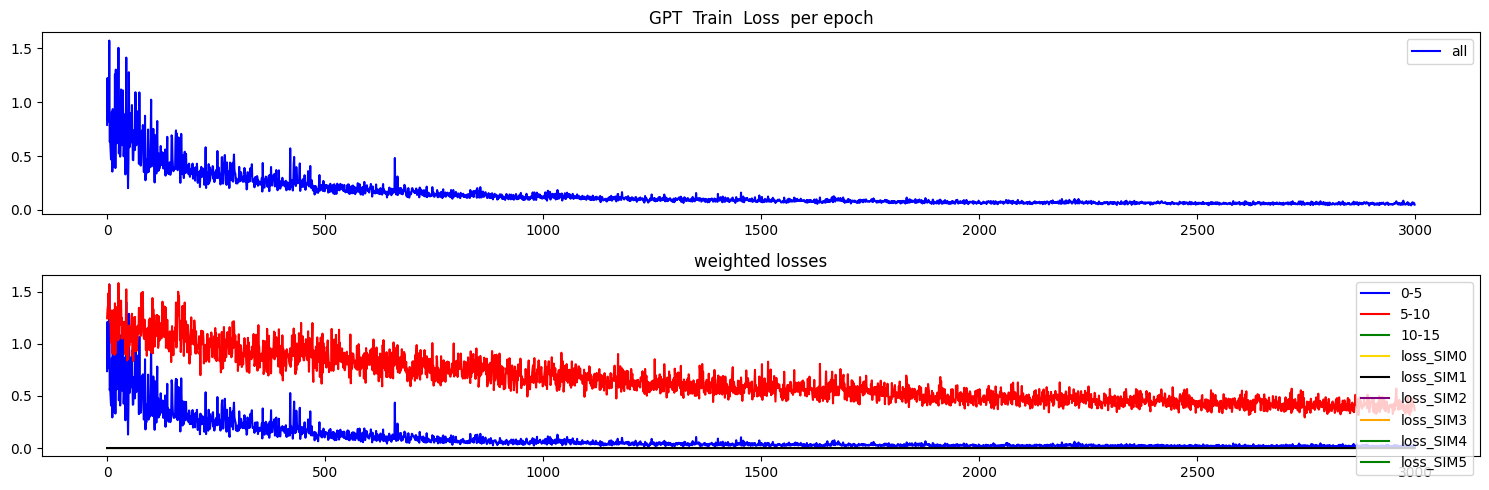

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


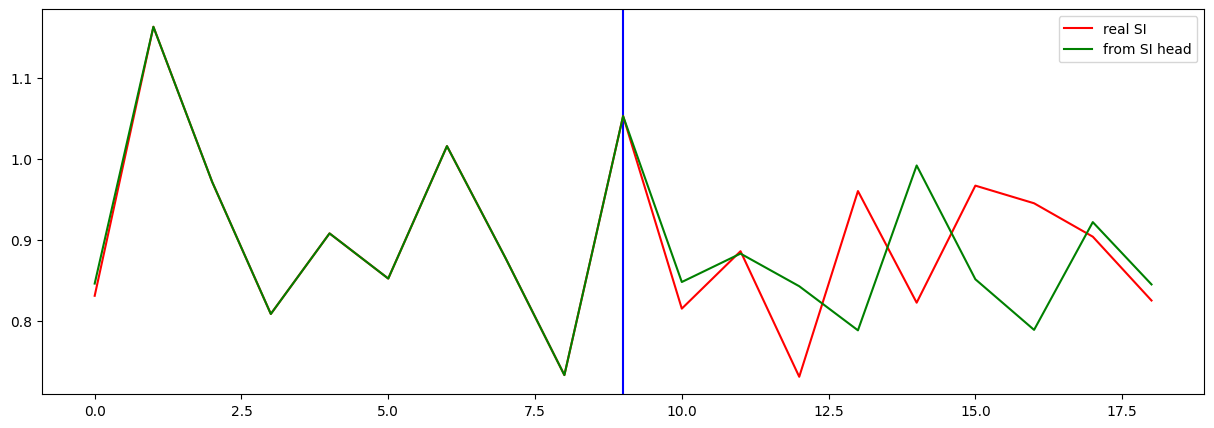

Testing R**2 - (all) - (no inputs):  0.9975968966379468
Testing R**2 - (f2) - SI full (no inputs):  -0.9865950994547104
Testing R**2 - SI head only (no inputs):  -0.44867884772300304
0 ...index R**2 (no inputs):  -1.6981956433697092
1 ...index R**2 (no inputs):  -0.23939624883143984
2 ...index R**2 (no inputs):  -0.9865950994547104
3 ...index R**2 (no inputs):  -38.46123883610262
4 ...index R**2 (no inputs):  -24.690883785888342
5 ...index R**2 (no inputs):  -3.527600947418401
6 ...index R**2 (no inputs):  -395.2640620981884
7 ...index R**2 (no inputs):  -1.639088585961344
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12368739946558005
10 ...index R**2 (no inputs):  -0.7514496447538099
11 ...index R**2 (no inputs):  -16.965281613662707
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.20132029172529
16 ...index R**2 (no inputs):  -3.8958997555363943
17 ...index R**2 (no inputs)

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.436227
Loss_SI: 0.3592967987060547 Loss_all: 1.1285960674285889
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.402508
Loss_SI: 0.34427160024642944 Loss_all: 0.926637589931488
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.239022
Loss_SI: 0.18912404775619507 Loss_all: 0.6881045699119568
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.176552
Loss_SI: 0.12571638822555542 Loss_all: 0.6340768933296204
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.088897
Loss_SI: 0.037059105932712555 Loss_all: 0.5554424524307251
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.096919
Loss_SI: 0.029029851779341698 Loss_all: 0.7079249620437622
Prediction shape: torch.Size([32, 35])
===


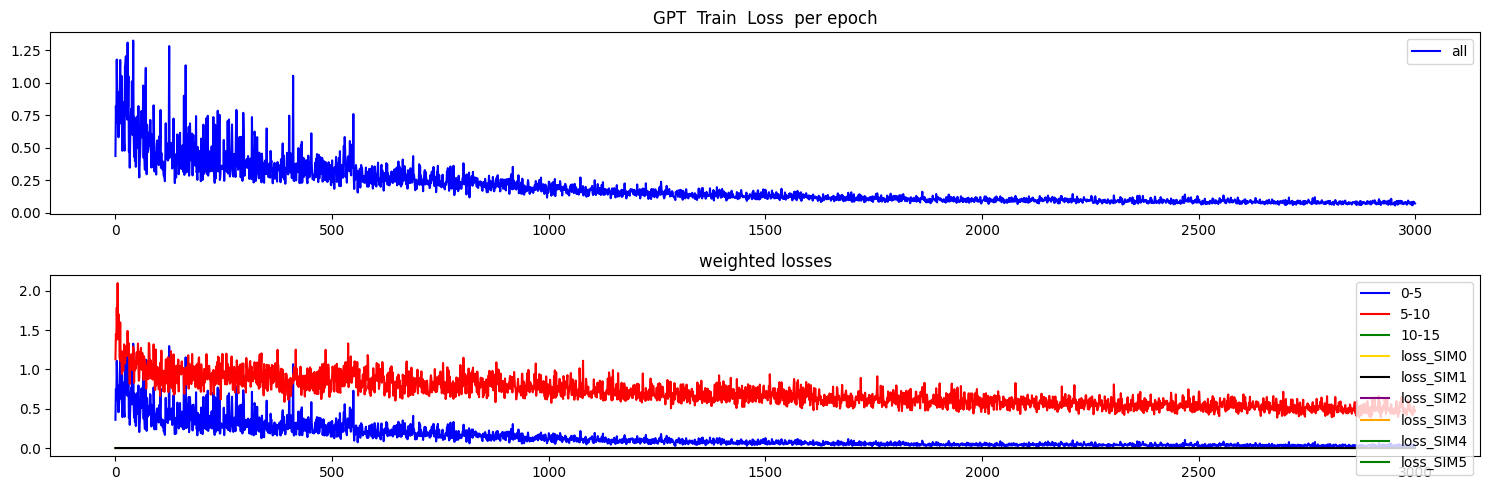

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


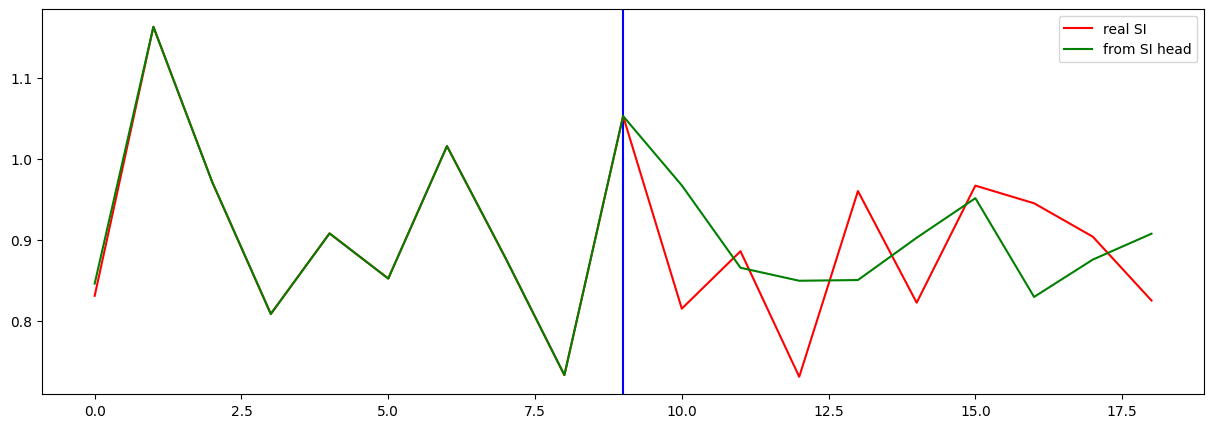

Testing R**2 - (all) - (no inputs):  0.9948722144132807
Testing R**2 - (f2) - SI full (no inputs):  -0.4710569584214648
Testing R**2 - SI head only (no inputs):  -0.12835579762073523
0 ...index R**2 (no inputs):  0.06605279514778939
1 ...index R**2 (no inputs):  -0.9444697744144526
2 ...index R**2 (no inputs):  -0.4710569584214648
3 ...index R**2 (no inputs):  -19.172589315234433
4 ...index R**2 (no inputs):  -252.36172492351128
5 ...index R**2 (no inputs):  -8.867529885041298
6 ...index R**2 (no inputs):  -289.9787342259405
7 ...index R**2 (no inputs):  0.23564647741316858
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.38606919509268645
10 ...index R**2 (no inputs):  -0.30239034823578304
11 ...index R**2 (no inputs):  -91.4293042444899
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.81794768655471
16 ...index R**2 (no inputs):  -5.039882841434919
17 ...index R**2 (no inputs)

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.842507
Loss_SI: 0.7351095080375671 Loss_all: 1.8090883493423462
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.181010
Loss_SI: 0.12888146936893463 Loss_all: 0.6501655578613281
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.194483
Loss_SI: 0.1368788629770279 Loss_all: 0.7129184007644653
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.132345
Loss_SI: 0.08007122576236725 Loss_all: 0.6028078198432922
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.109607
Loss_SI: 0.052247706800699234 Loss_all: 0.6258368492126465
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.085243
Loss_SI: 0.03684523329138756 Loss_all: 0.5208244323730469
Prediction shape: torch.Size([32, 35])
===


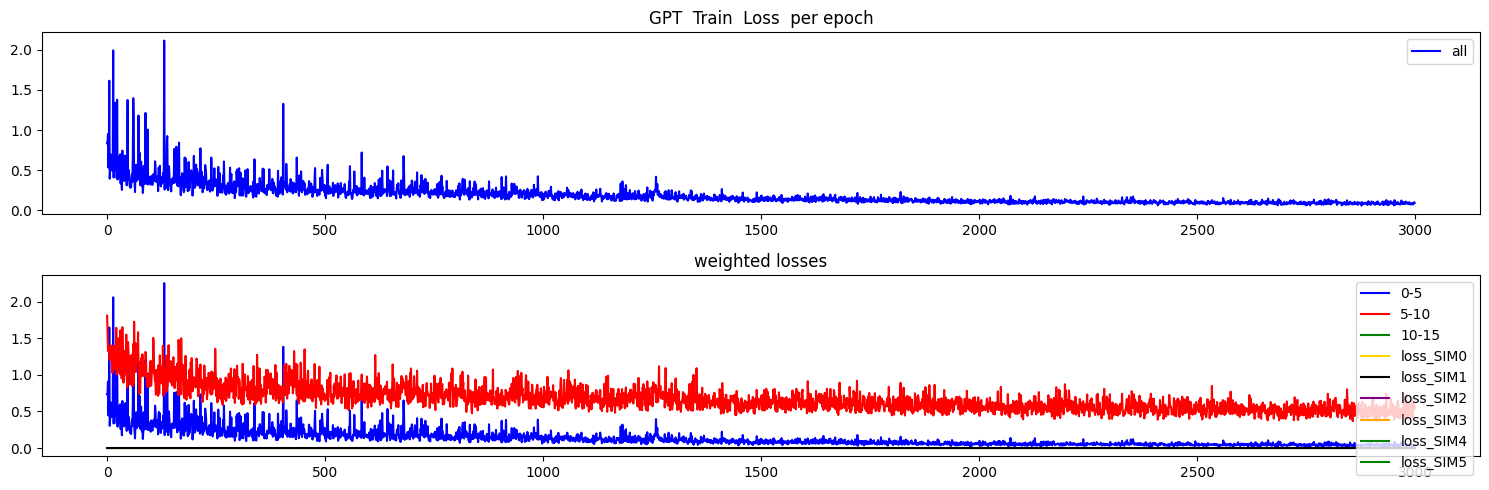

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


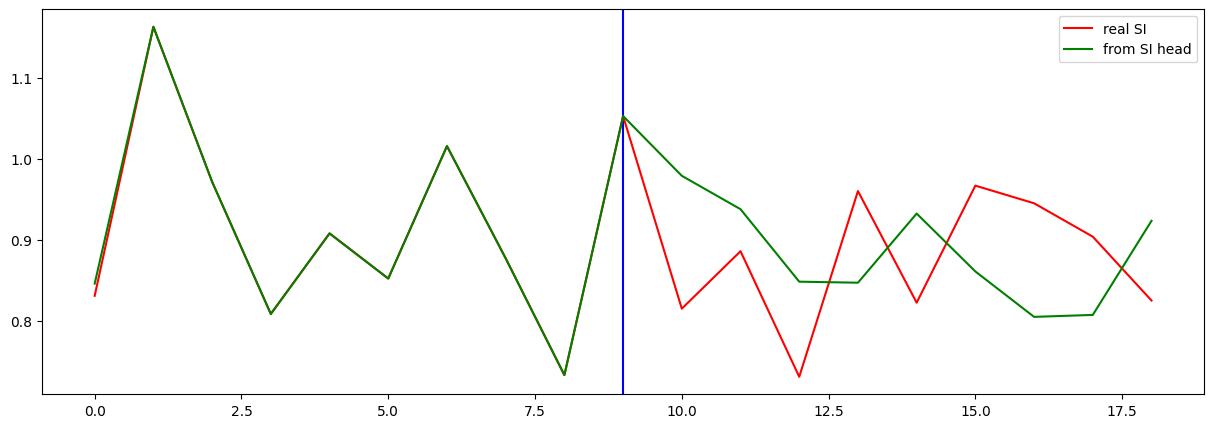

Testing R**2 - (all) - (no inputs):  0.9807294826544987
Testing R**2 - (f2) - SI full (no inputs):  -0.4486782359122259
Testing R**2 - SI head only (no inputs):  -0.8480177446363804
0 ...index R**2 (no inputs):  -0.16203752036258723
1 ...index R**2 (no inputs):  -2.2581251675358587
2 ...index R**2 (no inputs):  -0.4486782359122259
3 ...index R**2 (no inputs):  -35.70384986605295
4 ...index R**2 (no inputs):  -1345.593825701609
5 ...index R**2 (no inputs):  -36.739450848666834
6 ...index R**2 (no inputs):  -126.45714542208289
7 ...index R**2 (no inputs):  -0.5630349630804308
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0007434665129228968
10 ...index R**2 (no inputs):  -0.1258503828990063
11 ...index R**2 (no inputs):  -379.6052434263649
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.788478569804924
16 ...index R**2 (no inputs):  -0.6049030143745178
17 ...index R**2 (no inpu

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.155746
Loss_SI: 1.150710105895996 Loss_all: 1.2010688781738281
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.099177
Loss_SI: 0.03773821145296097 Loss_all: 0.6521308422088623
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.058232
Loss_SI: 0.01626017317175865 Loss_all: 0.43597957491874695
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.058941
Loss_SI: 0.022175997495651245 Loss_all: 0.38982805609703064
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.038928
Loss_SI: 0.005759717430919409 Loss_all: 0.3374450206756592
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.037590
Loss_SI: 0.01345276739448309 Loss_all: 0.25482308864593506
Prediction shape: torch.Size([32, 35])
===


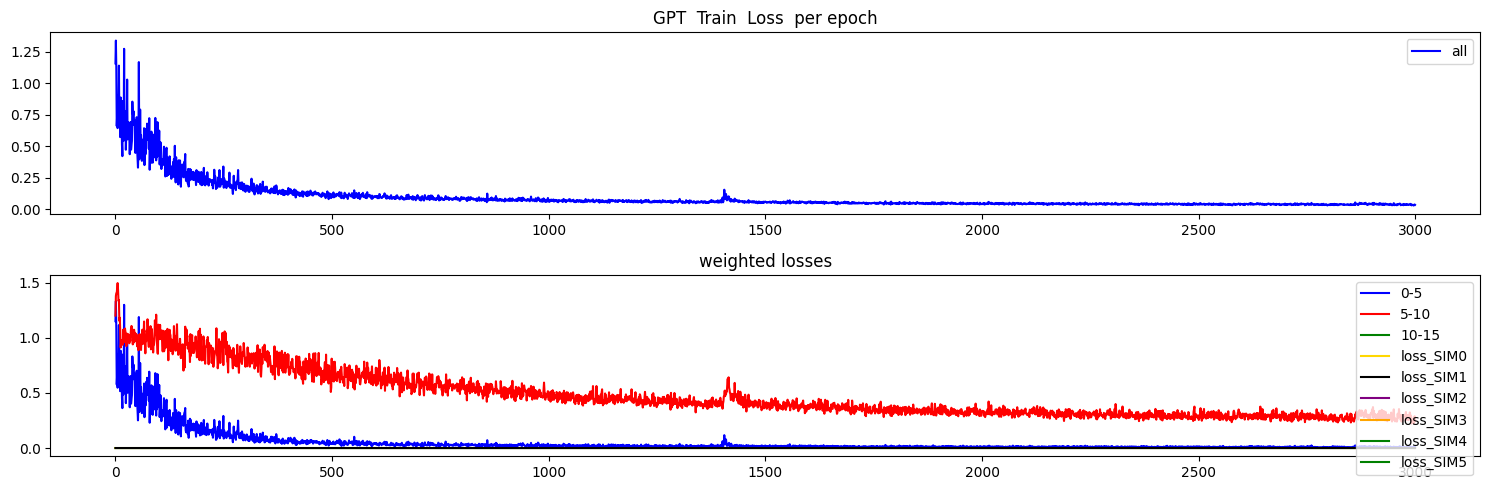

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


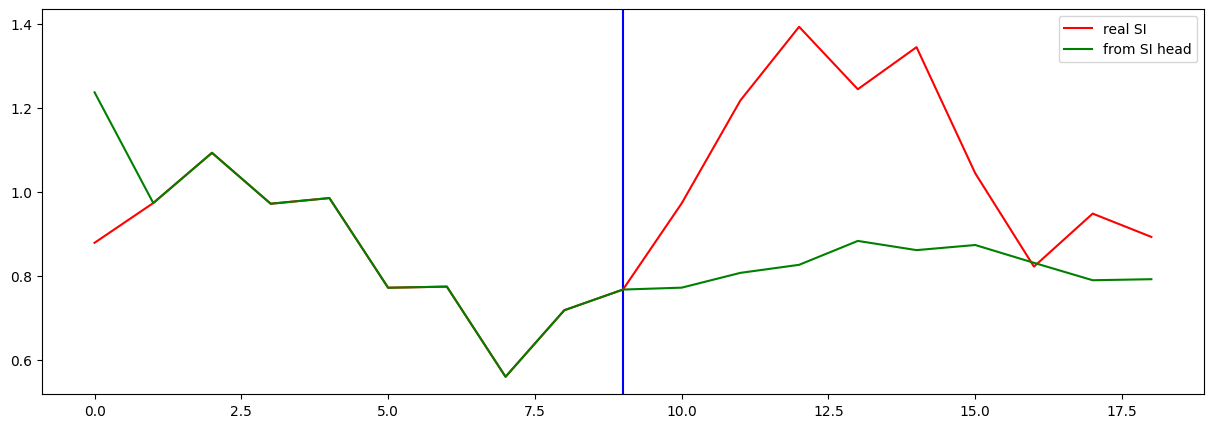

Testing R**2 - (all) - (no inputs):  0.9974091754441926
Testing R**2 - (f2) - SI full (no inputs):  -2.0063910696916136
Testing R**2 - SI head only (no inputs):  -1.6654331717287758
0 ...index R**2 (no inputs):  -0.26827819346113824
1 ...index R**2 (no inputs):  -13.46720326231351
2 ...index R**2 (no inputs):  -2.0063910696916136
3 ...index R**2 (no inputs):  -149.2245720372106
4 ...index R**2 (no inputs):  0.011467372016736754
5 ...index R**2 (no inputs):  -16.736916625225117
6 ...index R**2 (no inputs):  -8.01098510622551
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2790066595566087
10 ...index R**2 (no inputs):  0.47638175182977394
11 ...index R**2 (no inputs):  -18.96205483660951
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.870158338246579
16 ...index R**2 (no inputs):  -0.691946299919528
17 ...index R**2 (no inputs):  -52.10313995361

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.823557
Loss_SI: 0.790115475654602 Loss_all: 1.124533772468567
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.159262
Loss_SI: 0.09272691607475281 Loss_all: 0.7580798268318176
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.081313
Loss_SI: 0.02435249648988247 Loss_all: 0.5939615368843079
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.093370
Loss_SI: 0.040822140872478485 Loss_all: 0.5663036704063416
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.075417
Loss_SI: 0.029197193682193756 Loss_all: 0.49139487743377686
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.056005
Loss_SI: 0.013988761231303215 Loss_all: 0.4341551959514618
Prediction shape: torch.Size([32, 35])
===


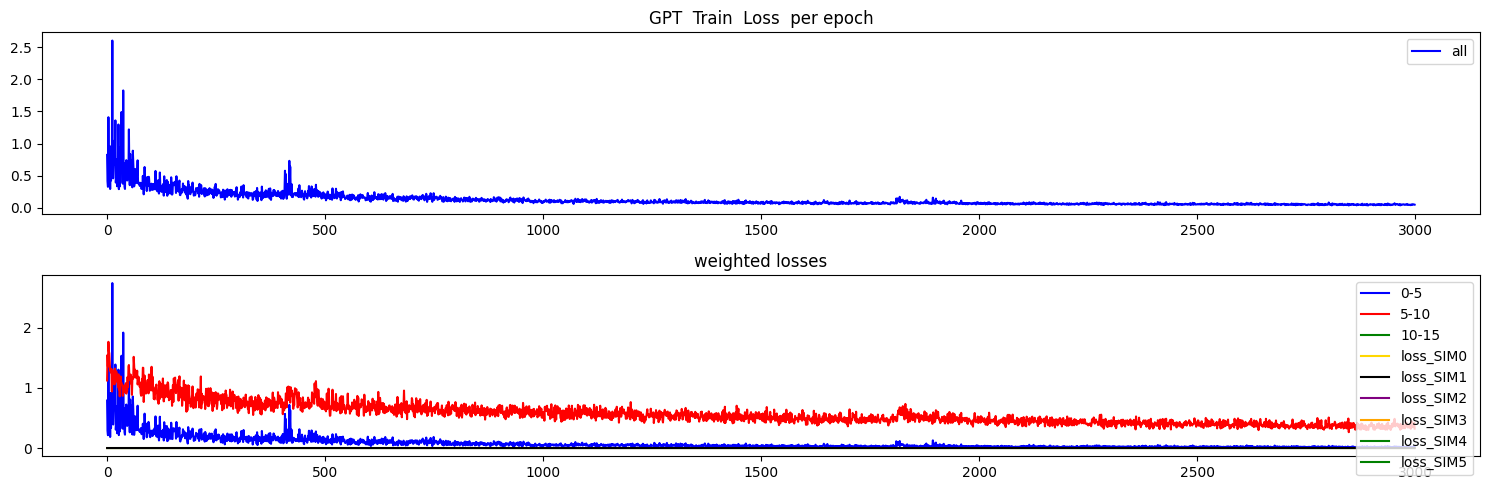

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


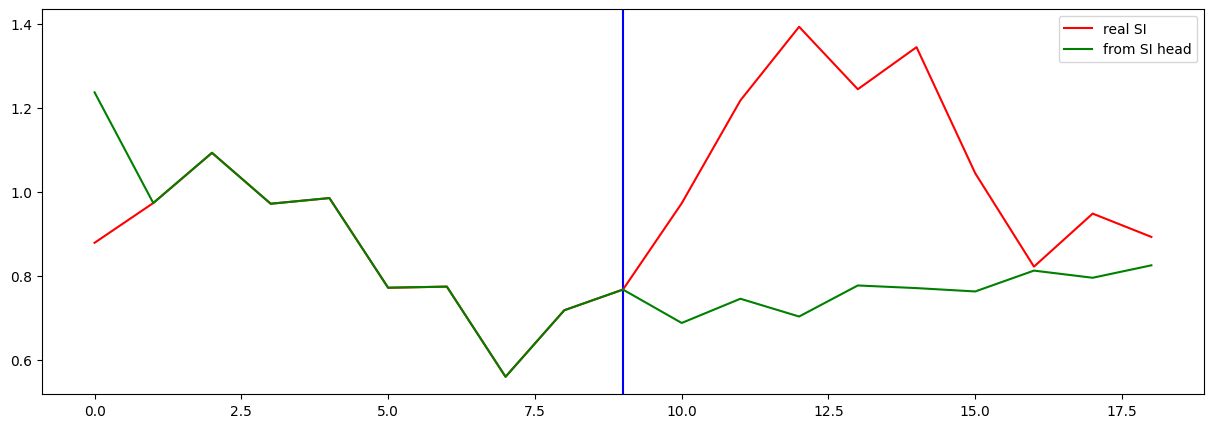

Testing R**2 - (all) - (no inputs):  0.9976876113508117
Testing R**2 - (f2) - SI full (no inputs):  -4.240445800298602
Testing R**2 - SI head only (no inputs):  -2.8041994906688705
0 ...index R**2 (no inputs):  -0.03558562065435944
1 ...index R**2 (no inputs):  -40.09259811145685
2 ...index R**2 (no inputs):  -4.240445800298602
3 ...index R**2 (no inputs):  -3897.0409468164407
4 ...index R**2 (no inputs):  -30.30324218389312
5 ...index R**2 (no inputs):  -13.832926360995321
6 ...index R**2 (no inputs):  -4.505250607537092
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6396761462969913
10 ...index R**2 (no inputs):  -0.6185620279875899
11 ...index R**2 (no inputs):  -631.9367789223757
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.800694175598241
16 ...index R**2 (no inputs):  0.23669587118169755
17 ...index R**2 (no inputs):  -841.31172500610

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.908046
Loss_SI: 0.8777615427970886 Loss_all: 1.1806035041809082
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.198064
Loss_SI: 0.10434029251337051 Loss_all: 1.0415773391723633
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.115192
Loss_SI: 0.05267401784658432 Loss_all: 0.6778556704521179
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.106753
Loss_SI: 0.04833289235830307 Loss_all: 0.6325353980064392
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.093485
Loss_SI: 0.05223848670721054 Loss_all: 0.4647080600261688
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.077516
Loss_SI: 0.02766267955303192 Loss_all: 0.5261915922164917
Prediction shape: torch.Size([32, 35])
===


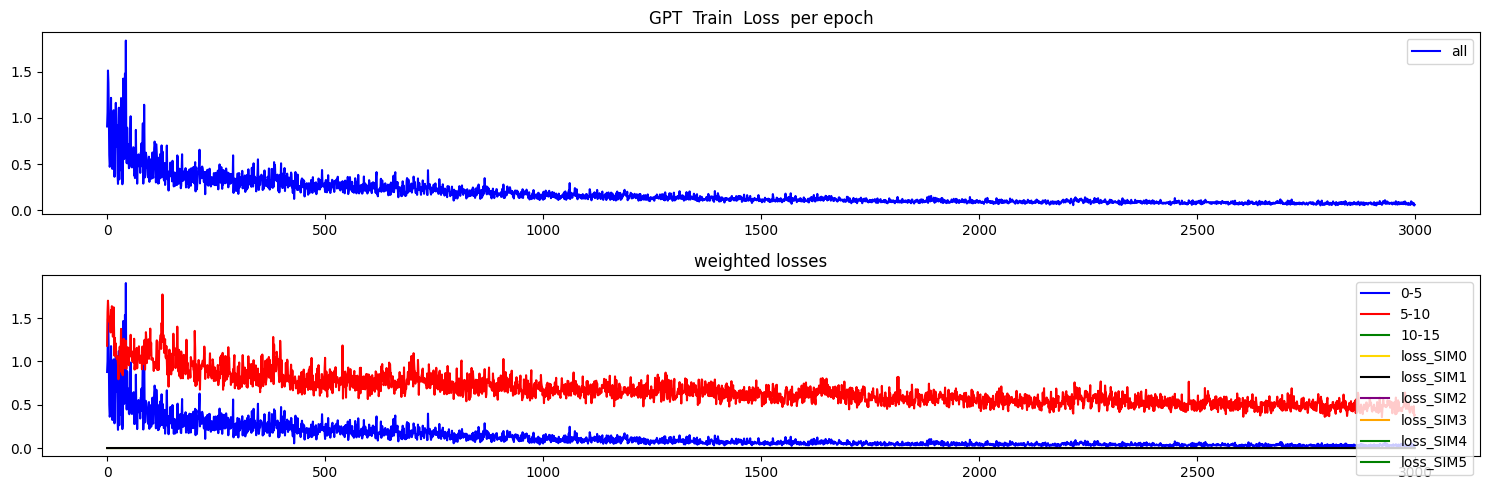

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


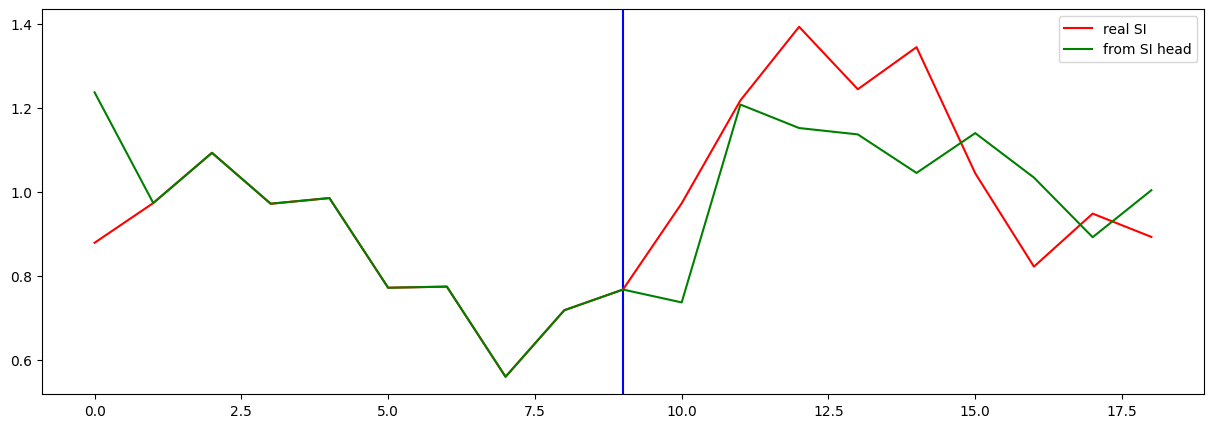

Testing R**2 - (all) - (no inputs):  0.9518758163411839
Testing R**2 - (f2) - SI full (no inputs):  0.03930430093222603
Testing R**2 - SI head only (no inputs):  -0.17930885227062987
0 ...index R**2 (no inputs):  0.15625838636323708
1 ...index R**2 (no inputs):  -3.3847606170380935
2 ...index R**2 (no inputs):  0.03930430093222603
3 ...index R**2 (no inputs):  -2260.9914451937184
4 ...index R**2 (no inputs):  -71.31494861106692
5 ...index R**2 (no inputs):  -332.37332225602125
6 ...index R**2 (no inputs):  -14.485598105328634
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.39139737202442104
10 ...index R**2 (no inputs):  -0.5134271552029621
11 ...index R**2 (no inputs):  -982.5134604080238
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5533150420615875
16 ...index R**2 (no inputs):  -0.09338743874527244
17 ...index R**2 (no inputs):  -98.78154

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.106612
Loss_SI: 1.1128671169281006 Loss_all: 1.05031418800354
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.339188
Loss_SI: 0.31028029322624207 Loss_all: 0.5993561744689941
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.196946
Loss_SI: 0.15426142513751984 Loss_all: 0.5811034440994263
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.164968
Loss_SI: 0.11660335958003998 Loss_all: 0.6002530455589294
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.129793
Loss_SI: 0.08233805745840073 Loss_all: 0.556889533996582
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.104002
Loss_SI: 0.06049709394574165 Loss_all: 0.49554961919784546
Prediction shape: torch.Size([32, 35])
===


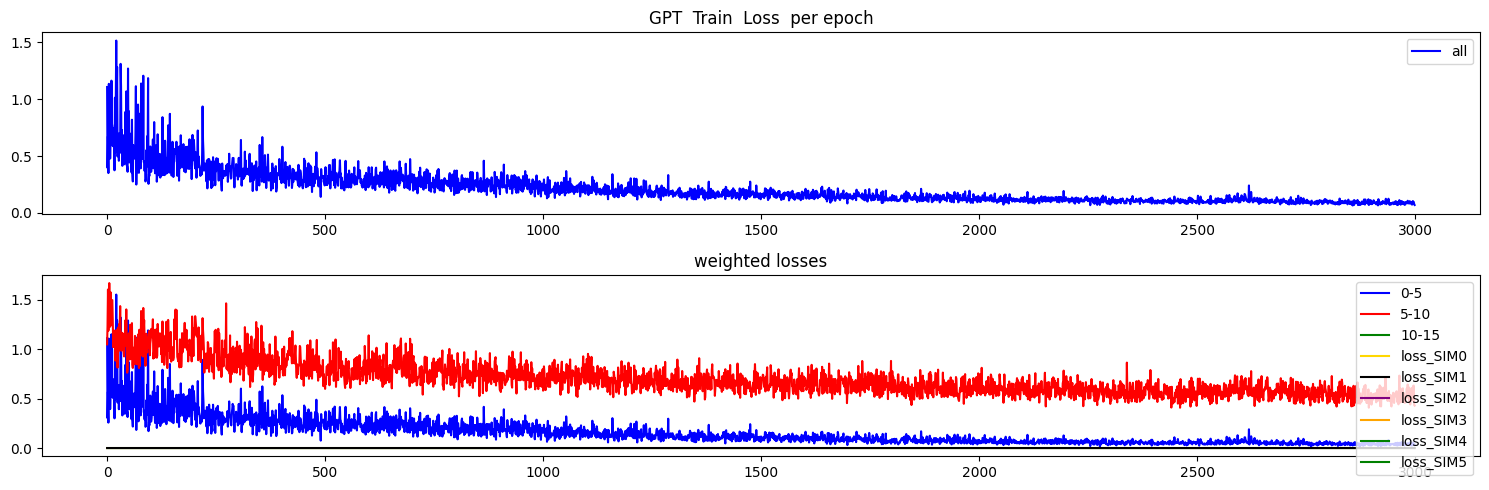

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


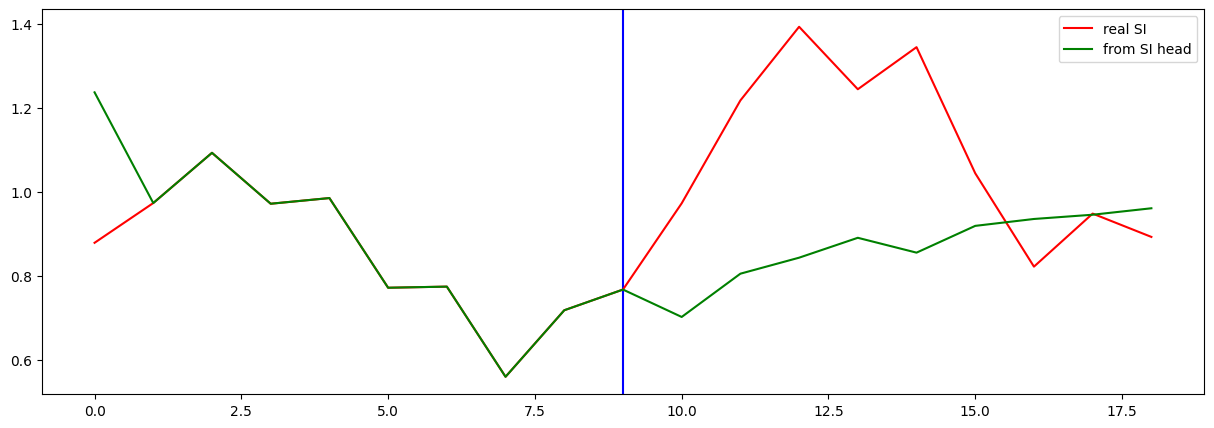

Testing R**2 - (all) - (no inputs):  0.9973413656678602
Testing R**2 - (f2) - SI full (no inputs):  -0.9803439539170686
Testing R**2 - SI head only (no inputs):  -1.7602489370592793
0 ...index R**2 (no inputs):  0.0836119509251978
1 ...index R**2 (no inputs):  -10.322141194434833
2 ...index R**2 (no inputs):  -0.9803439539170686
3 ...index R**2 (no inputs):  -5011.6410657590195
4 ...index R**2 (no inputs):  -5.793094673255437
5 ...index R**2 (no inputs):  -16.979594784596824
6 ...index R**2 (no inputs):  -20.536111325992554
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.11129668045231211
10 ...index R**2 (no inputs):  -0.16989610323833793
11 ...index R**2 (no inputs):  -879.3861803576127
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4411831974707892
16 ...index R**2 (no inputs):  -0.18292297092482923
17 ...index R**2 (no inputs):  -161.89795

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.738850
Loss_SI: 0.683137834072113 Loss_all: 1.2402629852294922
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.127629
Loss_SI: 0.06603048741817474 Loss_all: 0.6820202469825745
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.051172
Loss_SI: 0.016847822815179825 Loss_all: 0.36009132862091064
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.045489
Loss_SI: 0.012106601148843765 Loss_all: 0.3459347188472748
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.037063
Loss_SI: 0.006950633600354195 Loss_all: 0.30807581543922424
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.031236
Loss_SI: 0.006677613593637943 Loss_all: 0.2522636651992798
Prediction shape: torch.Size([32, 35])
===


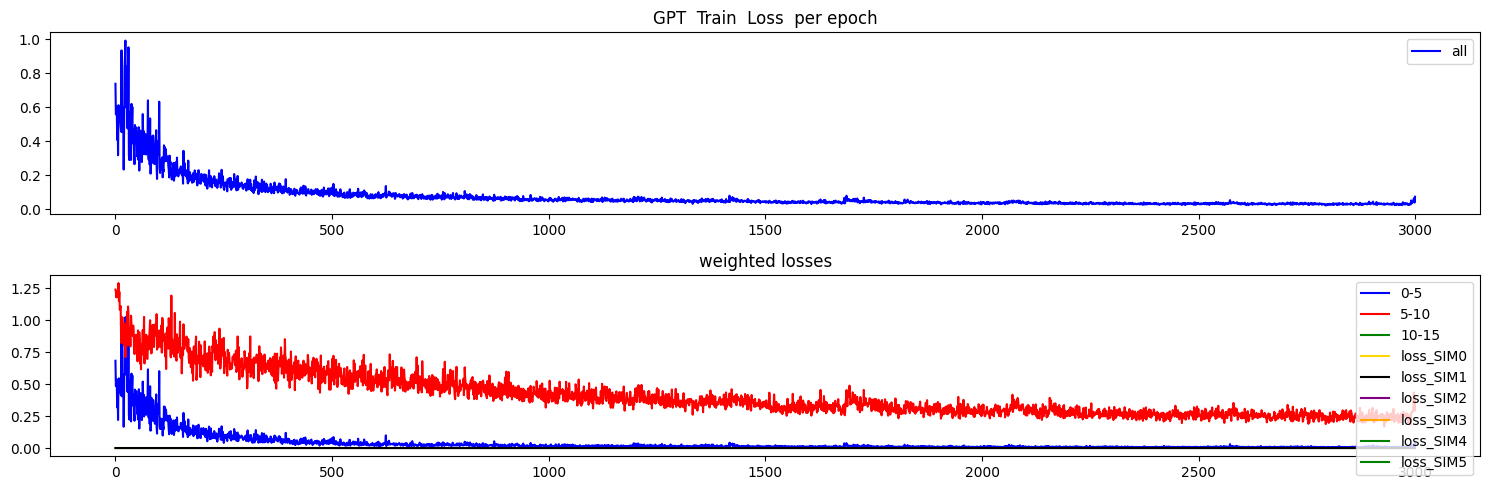

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


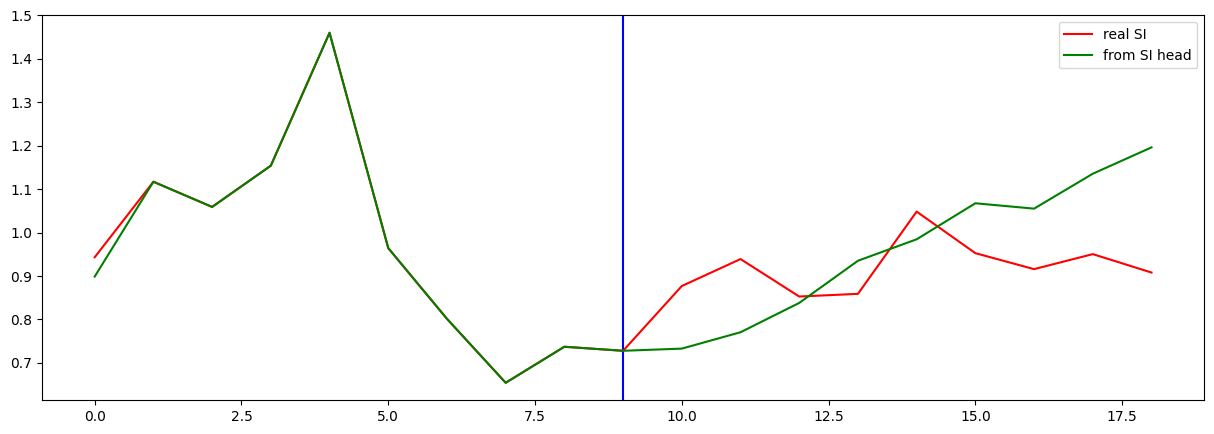

Testing R**2 - (all) - (no inputs):  0.9957366172221432
Testing R**2 - (f2) - SI full (no inputs):  -3.6693920215324978
Testing R**2 - SI head only (no inputs):  -6.936937442112058
0 ...index R**2 (no inputs):  -2.3531895478986837
1 ...index R**2 (no inputs):  -0.03051043526019903
2 ...index R**2 (no inputs):  -3.6693920215324978
3 ...index R**2 (no inputs):  -533.3043374536893
4 ...index R**2 (no inputs):  -115.7559240568405
5 ...index R**2 (no inputs):  -98.01644264521784
6 ...index R**2 (no inputs):  -1338.4954791911703
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -15.784471854813429
10 ...index R**2 (no inputs):  -0.8432080404563662
11 ...index R**2 (no inputs):  -42.95801836189655
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.412588875757884
16 ...index R**2 (no inputs):  -0.18795390964319258
17 ...index R**2 (no inputs):  -207.661369899

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.817690
Loss_SI: 0.7614731192588806 Loss_all: 1.3236453533172607
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.176403
Loss_SI: 0.11333337426185608 Loss_all: 0.7440274357795715
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.103553
Loss_SI: 0.0455327108502388 Loss_all: 0.6257317662239075
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.060267
Loss_SI: 0.020222967490553856 Loss_all: 0.4206649363040924
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.061089
Loss_SI: 0.018885085359215736 Loss_all: 0.44092249870300293
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.056440
Loss_SI: 0.01972479745745659 Loss_all: 0.38687992095947266
Prediction shape: torch.Size([32, 35])
===


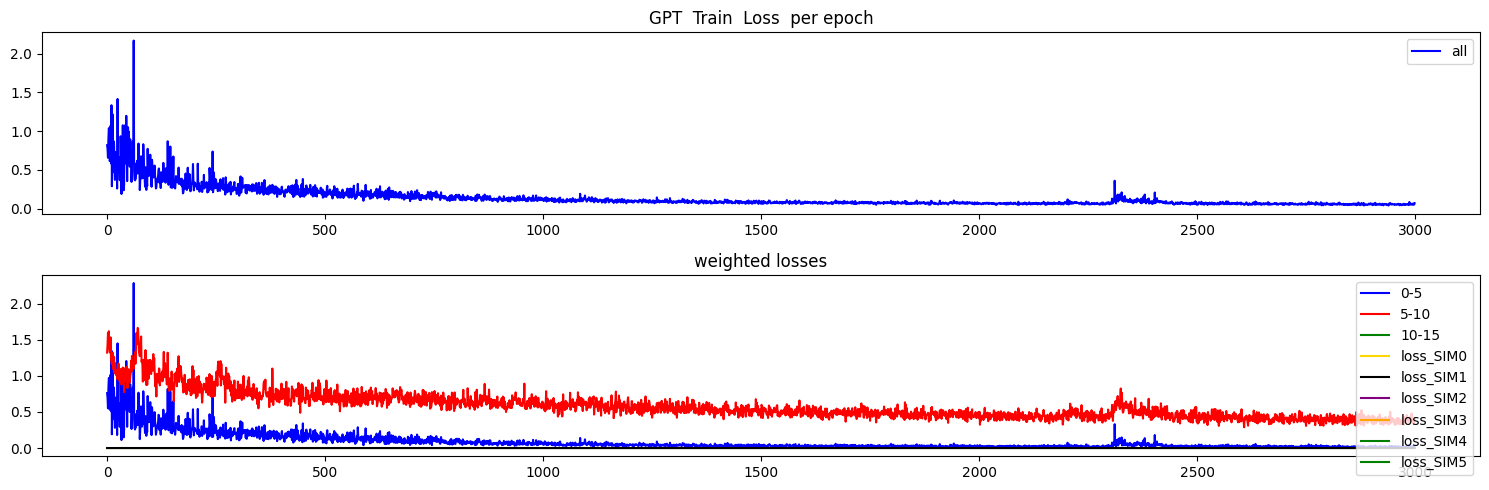

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


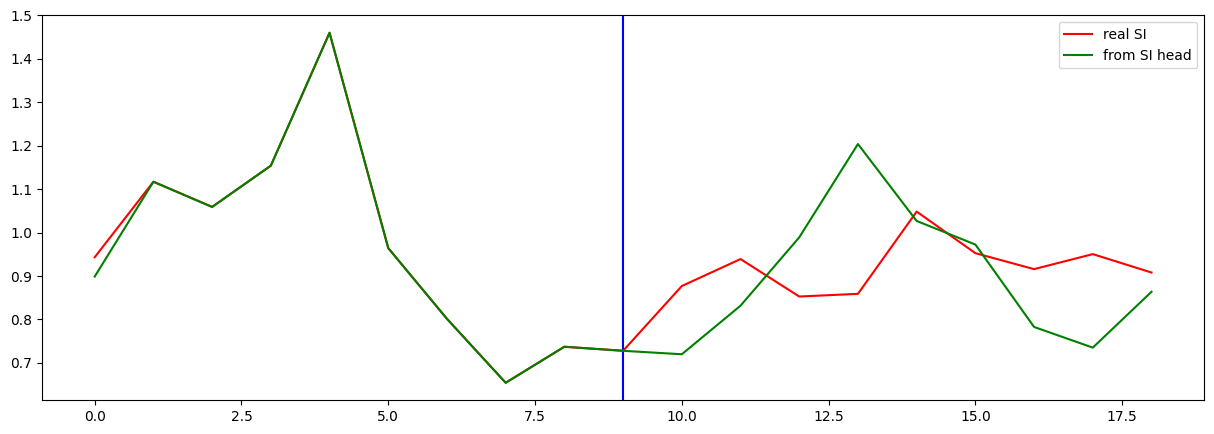

Testing R**2 - (all) - (no inputs):  0.9731720030289206
Testing R**2 - (f2) - SI full (no inputs):  -32.95976213446153
Testing R**2 - SI head only (no inputs):  -5.053159907821506
0 ...index R**2 (no inputs):  -0.7818617038784648
1 ...index R**2 (no inputs):  -2.73850013974268
2 ...index R**2 (no inputs):  -32.95976213446153
3 ...index R**2 (no inputs):  -2285.3243901562987
4 ...index R**2 (no inputs):  -2138.9512006337854
5 ...index R**2 (no inputs):  -635.6085666034451
6 ...index R**2 (no inputs):  -395.1860223853067
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.7422021603018298
10 ...index R**2 (no inputs):  -0.38162779641596867
11 ...index R**2 (no inputs):  -246.28821157348472
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -24.709507234468077
16 ...index R**2 (no inputs):  -0.5163703311534995
17 ...index R**2 (no inputs):  -112.52640977253

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.515572
Loss_SI: 0.397864431142807 Loss_all: 1.5749411582946777
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.223305
Loss_SI: 0.16633743047714233 Loss_all: 0.7360121011734009
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.156768
Loss_SI: 0.09819232672452927 Loss_all: 0.6839502453804016
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.115772
Loss_SI: 0.06029737368226051 Loss_all: 0.6150392889976501
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.091363
Loss_SI: 0.04648923873901367 Loss_all: 0.4952302575111389
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.101815
Loss_SI: 0.04354386776685715 Loss_all: 0.6262515783309937
Prediction shape: torch.Size([32, 35])
===


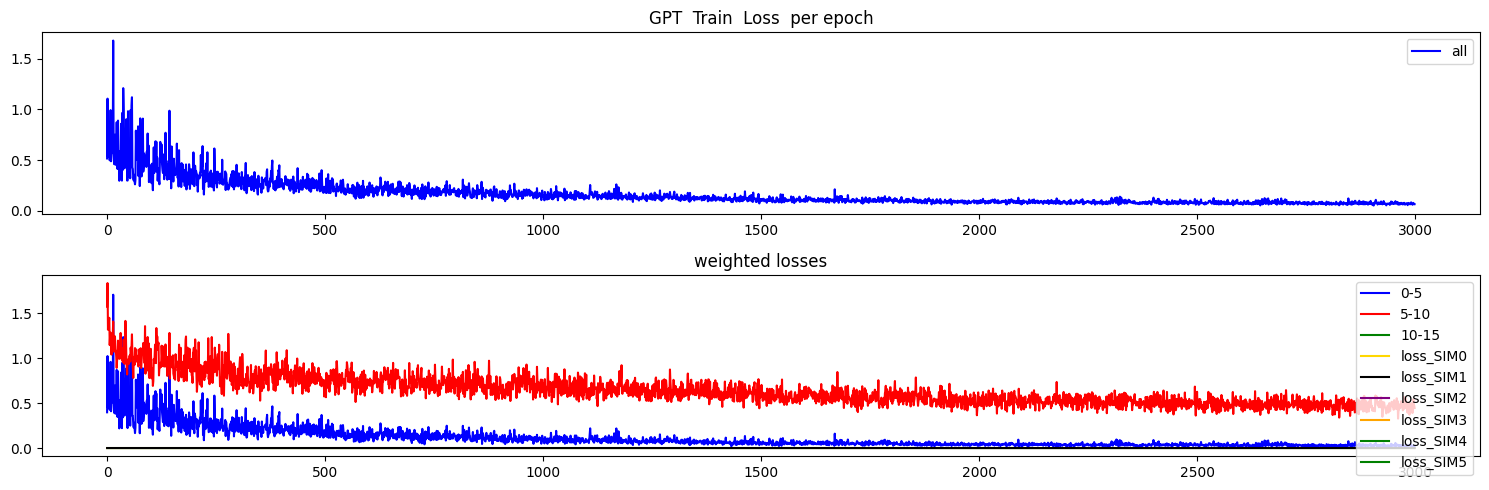

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


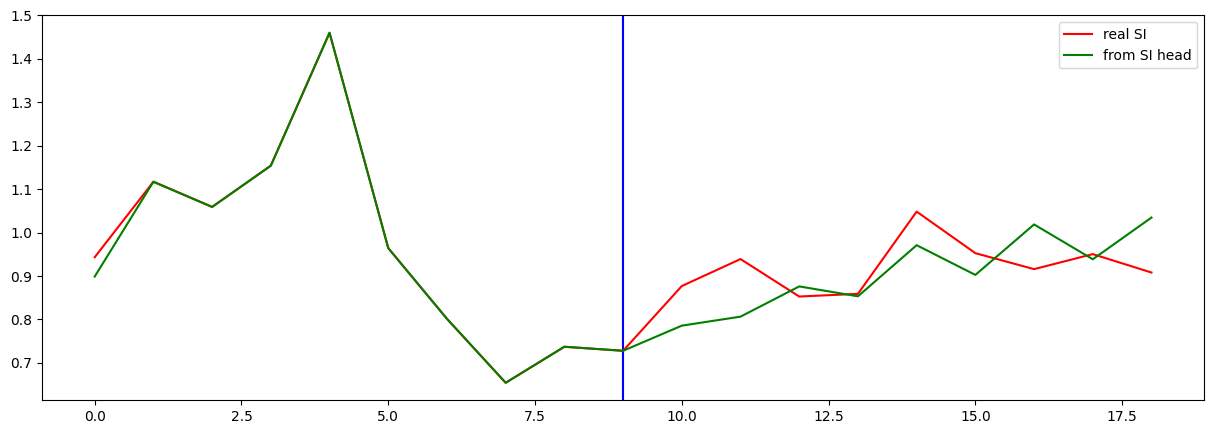

Testing R**2 - (all) - (no inputs):  0.9387713856667294
Testing R**2 - (f2) - SI full (no inputs):  -5.370769051633906
Testing R**2 - SI head only (no inputs):  -1.9204101570810463
0 ...index R**2 (no inputs):  -3.1040858919549015
1 ...index R**2 (no inputs):  0.2195701748806559
2 ...index R**2 (no inputs):  -5.370769051633906
3 ...index R**2 (no inputs):  -303.51773957353174
4 ...index R**2 (no inputs):  -174.6027634924128
5 ...index R**2 (no inputs):  -1441.9061354719959
6 ...index R**2 (no inputs):  -119.92259626219614
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.413045528781024
10 ...index R**2 (no inputs):  -1.1485456135770846
11 ...index R**2 (no inputs):  -66.49647961628064
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -42.18788371256868
16 ...index R**2 (no inputs):  -1.7264239558307803
17 ...index R**2 (no inputs):  -3667.44177303049

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.302234
Loss_SI: 0.19695231318473816 Loss_all: 1.2497705221176147
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.218301
Loss_SI: 0.16416515409946442 Loss_all: 0.7055249214172363
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.264762
Loss_SI: 0.22397202253341675 Loss_all: 0.6318669319152832
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.140269
Loss_SI: 0.08721140027046204 Loss_all: 0.6177826523780823
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.127810
Loss_SI: 0.06002190709114075 Loss_all: 0.7379012703895569
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.095667
Loss_SI: 0.03554932773113251 Loss_all: 0.6367229223251343
Prediction shape: torch.Size([32, 35])
===


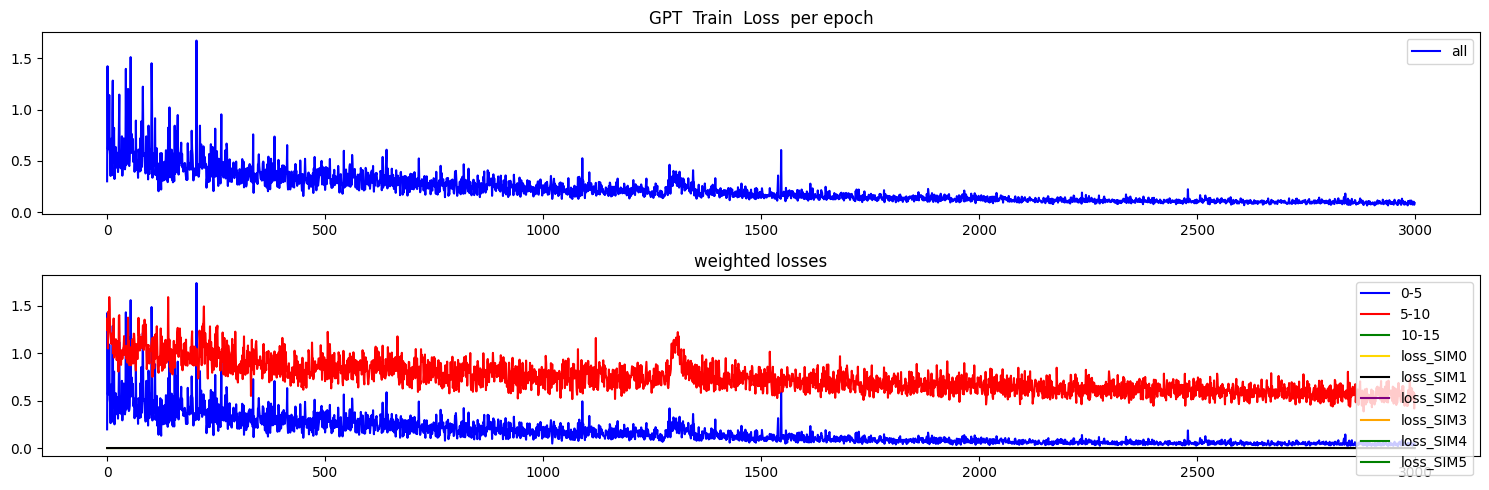

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


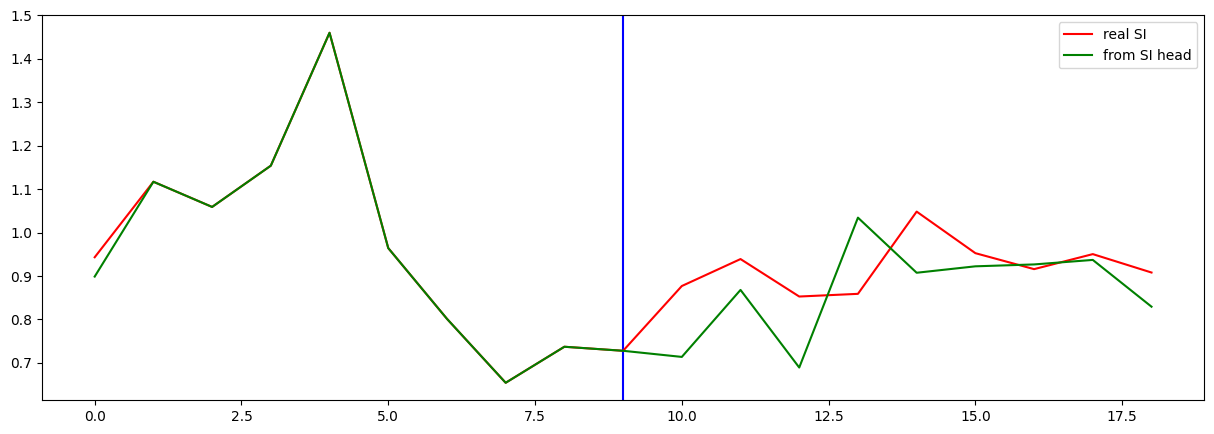

Testing R**2 - (all) - (no inputs):  0.9590717678233025
Testing R**2 - (f2) - SI full (no inputs):  -1.3657613570777678
Testing R**2 - SI head only (no inputs):  -2.5877348371163236
0 ...index R**2 (no inputs):  -0.71831254635663
1 ...index R**2 (no inputs):  -0.1341314738494963
2 ...index R**2 (no inputs):  -1.3657613570777678
3 ...index R**2 (no inputs):  -200.40576368140998
4 ...index R**2 (no inputs):  -490.5074847496974
5 ...index R**2 (no inputs):  -970.8296082978973
6 ...index R**2 (no inputs):  -162.57051367482032
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.4247964649605347
10 ...index R**2 (no inputs):  -0.6789723966586148
11 ...index R**2 (no inputs):  -370.95898324190057
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -38.75784317573807
16 ...index R**2 (no inputs):  -1.683770312115486
17 ...index R**2 (no inputs):  -1328.3096948634

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.684461
Loss_SI: 0.6040741801261902 Loss_all: 1.4079428911209106
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.176300
Loss_SI: 0.11064168810844421 Loss_all: 0.7672204375267029
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.073401
Loss_SI: 0.023120101541280746 Loss_all: 0.5259338617324829
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.049622
Loss_SI: 0.012758915312588215 Loss_all: 0.38139107823371887
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.045638
Loss_SI: 0.010854884050786495 Loss_all: 0.35868123173713684
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.043171
Loss_SI: 0.012008832767605782 Loss_all: 0.32362812757492065
Prediction shape: torch.Size([32, 35])
===


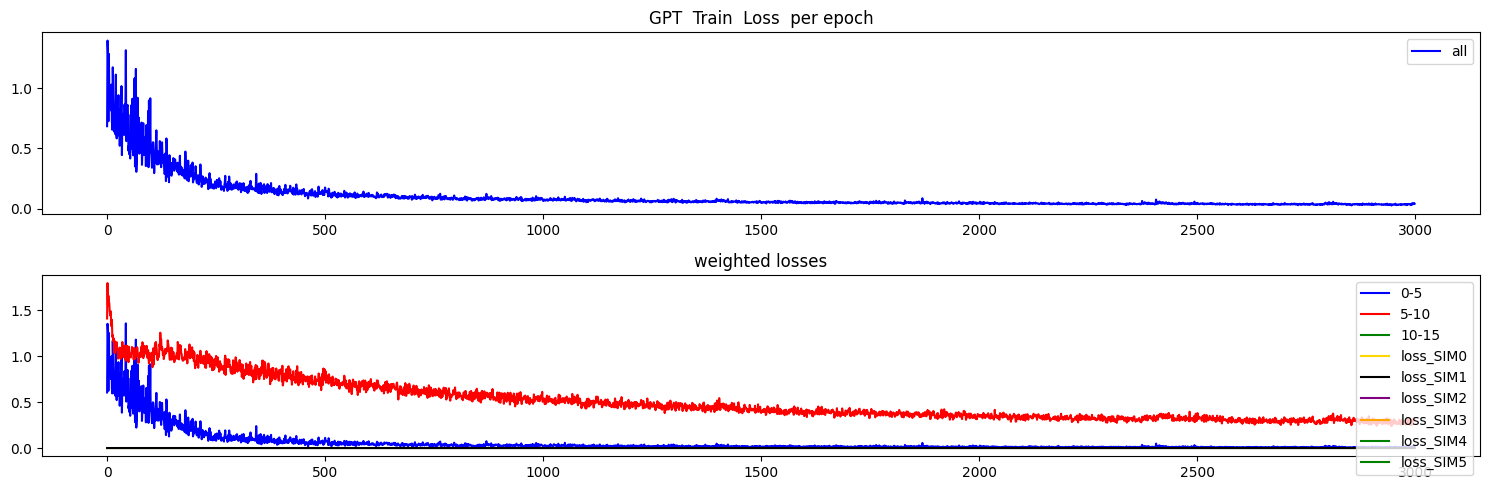

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


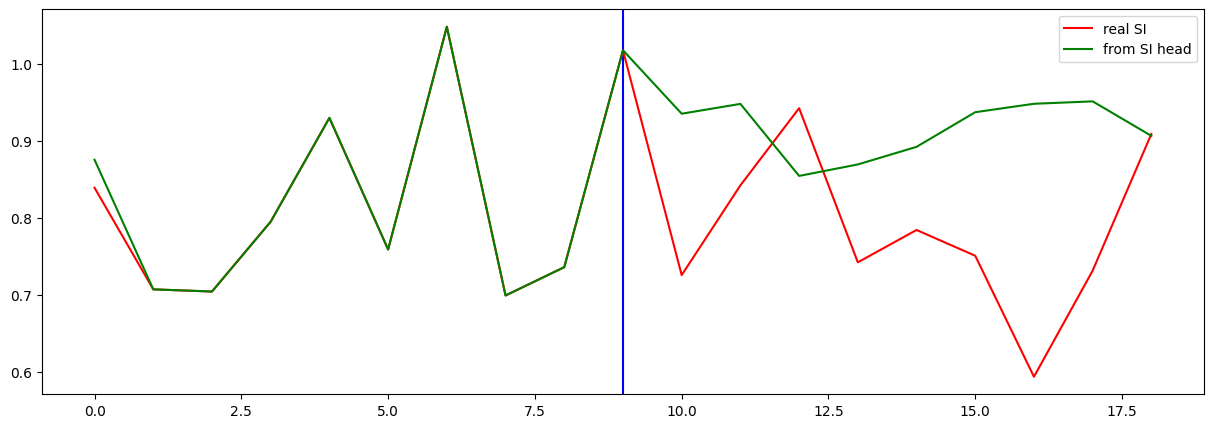

Testing R**2 - (all) - (no inputs):  0.9958435079760484
Testing R**2 - (f2) - SI full (no inputs):  -0.4233751901230798
Testing R**2 - SI head only (no inputs):  -1.4894933218833155
0 ...index R**2 (no inputs):  -0.2096885993431863
1 ...index R**2 (no inputs):  0.15071972661719946
2 ...index R**2 (no inputs):  -0.4233751901230798
3 ...index R**2 (no inputs):  -80.11977335126876
4 ...index R**2 (no inputs):  -0.21172508981364935
5 ...index R**2 (no inputs):  -0.17866454179572178
6 ...index R**2 (no inputs):  -873.3036214807987
7 ...index R**2 (no inputs):  -9.729585917319381
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.18431272815039845
10 ...index R**2 (no inputs):  0.013149240065036705
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.119478448259509
16 ...index R**2 (no inputs):  -0.5834032243817819
17 ...index R**2 (no inputs):  -34.987669

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.680669
Loss_SI: 0.6083154082298279 Loss_all: 1.3318532705307007
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.112039
Loss_SI: 0.053849928081035614 Loss_all: 0.6357431411743164
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.096356
Loss_SI: 0.05658058449625969 Loss_all: 0.4543333649635315
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.078639
Loss_SI: 0.04200384020805359 Loss_all: 0.4083534777164459
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.052813
Loss_SI: 0.013503280468285084 Loss_all: 0.40659576654434204
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.055993
Loss_SI: 0.02358224056661129 Loss_all: 0.34768956899642944
Prediction shape: torch.Size([32, 35])
===


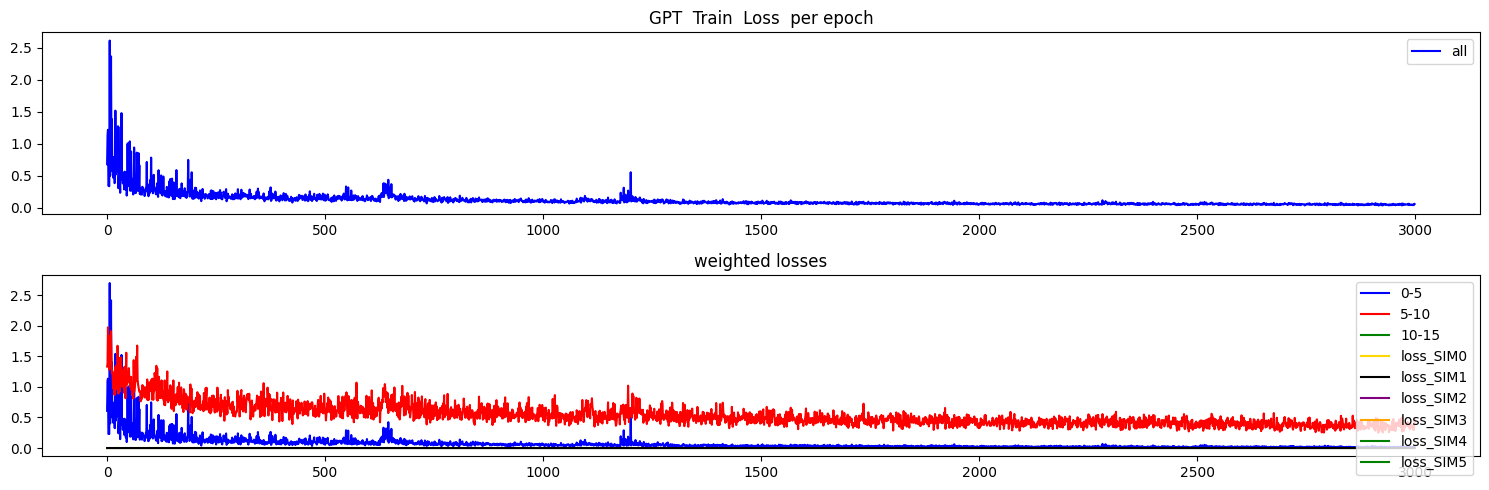

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


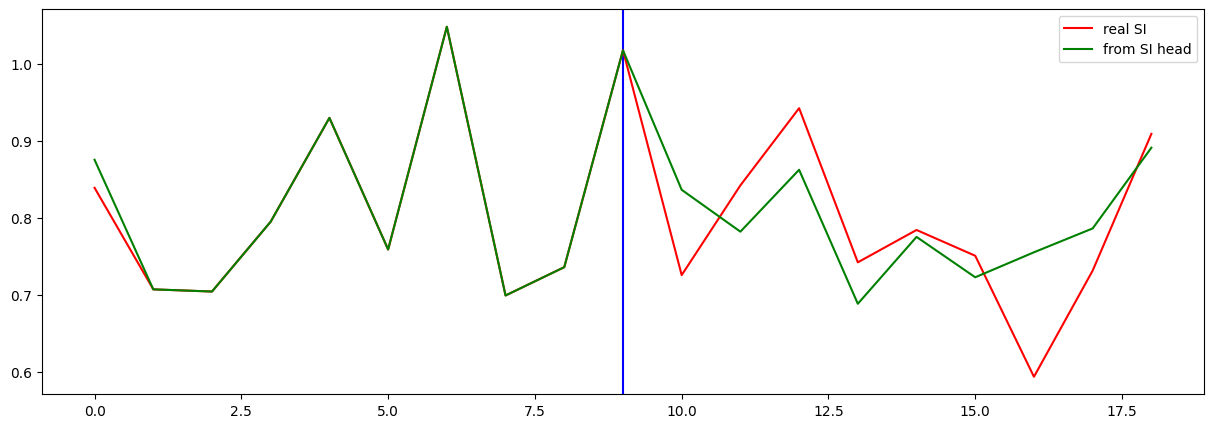

Testing R**2 - (all) - (no inputs):  0.986141924139098
Testing R**2 - (f2) - SI full (no inputs):  0.011995897901401653
Testing R**2 - SI head only (no inputs):  0.037194060674934804
0 ...index R**2 (no inputs):  -1.1941394776578047
1 ...index R**2 (no inputs):  -0.12594734565686605
2 ...index R**2 (no inputs):  0.011995897901401653
3 ...index R**2 (no inputs):  -28.656637945859647
4 ...index R**2 (no inputs):  -2.529000228536213
5 ...index R**2 (no inputs):  -2.960158787591429
6 ...index R**2 (no inputs):  -150.00276309885732
7 ...index R**2 (no inputs):  -37.03443878397463
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.34559690395384246
10 ...index R**2 (no inputs):  -0.48846783549680883
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2255475230012547
16 ...index R**2 (no inputs):  -0.38844894434584964
17 ...index R**2 (no inputs):  -75.614

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.548379
Loss_SI: 0.4843382239341736 Loss_all: 1.1247448921203613
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.140751
Loss_SI: 0.10429267585277557 Loss_all: 0.4688721001148224
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.094253
Loss_SI: 0.06109216809272766 Loss_all: 0.3927038013935089
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.072495
Loss_SI: 0.039690569043159485 Loss_all: 0.36773088574409485
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.089699
Loss_SI: 0.04133221507072449 Loss_all: 0.5249976515769958
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.070778
Loss_SI: 0.042709220200777054 Loss_all: 0.3233938217163086
Prediction shape: torch.Size([32, 35])
===


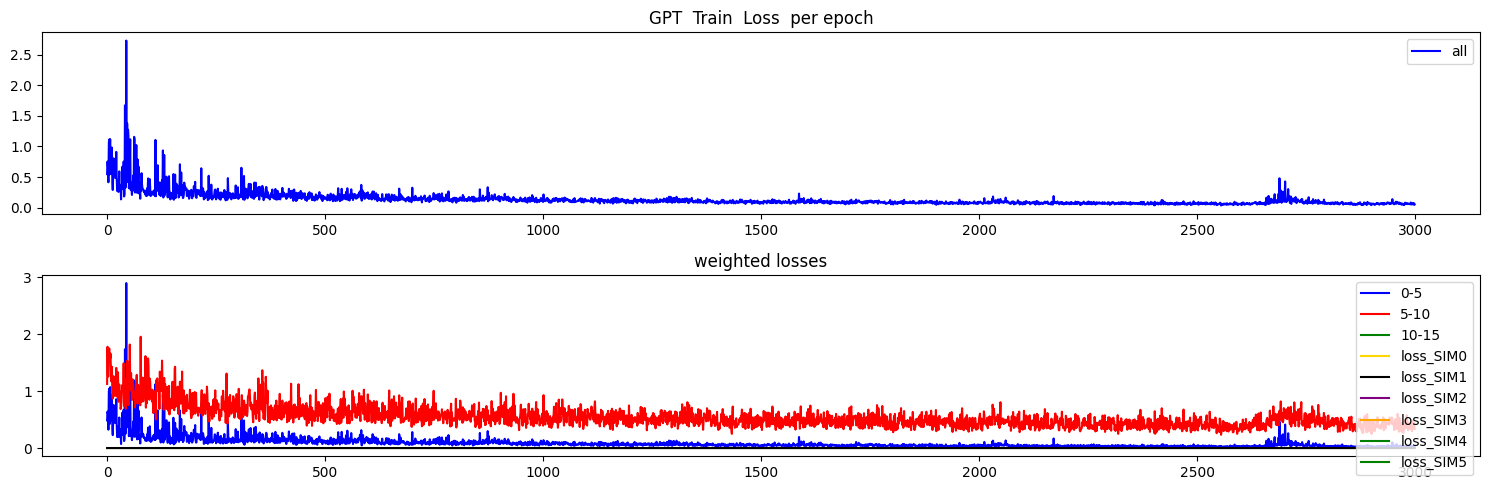

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


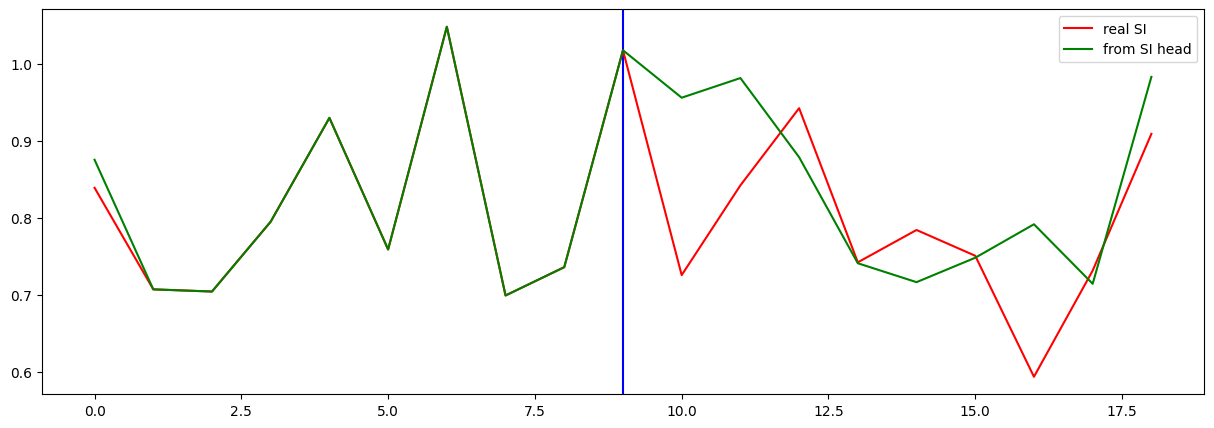

Testing R**2 - (all) - (no inputs):  0.9759098879921947
Testing R**2 - (f2) - SI full (no inputs):  -0.35372158911027984
Testing R**2 - SI head only (no inputs):  -0.38531714016119345
0 ...index R**2 (no inputs):  -0.7273870563233067
1 ...index R**2 (no inputs):  -0.0022435669777887135
2 ...index R**2 (no inputs):  -0.35372158911027984
3 ...index R**2 (no inputs):  -115.88366633742817
4 ...index R**2 (no inputs):  -14.251044261365399
5 ...index R**2 (no inputs):  -5.300341084395199
6 ...index R**2 (no inputs):  -9.864107214670875
7 ...index R**2 (no inputs):  -411.78798491603067
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.031527856130692644
10 ...index R**2 (no inputs):  0.4042696829461655
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4884403759852551
16 ...index R**2 (no inputs):  -0.308378647086631
17 ...index R**2 (no inputs):  -21956

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.761425
Loss_SI: 0.7257363796234131 Loss_all: 1.0826210975646973
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.267387
Loss_SI: 0.2430577129125595 Loss_all: 0.4863528907299042
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.122636
Loss_SI: 0.07485954463481903 Loss_all: 0.5526285767555237
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.093197
Loss_SI: 0.058054741472005844 Loss_all: 0.40947404503822327
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.080600
Loss_SI: 0.04760130122303963 Loss_all: 0.3775905966758728
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.080223
Loss_SI: 0.042928580194711685 Loss_all: 0.41586899757385254
Prediction shape: torch.Size([32, 35])
===


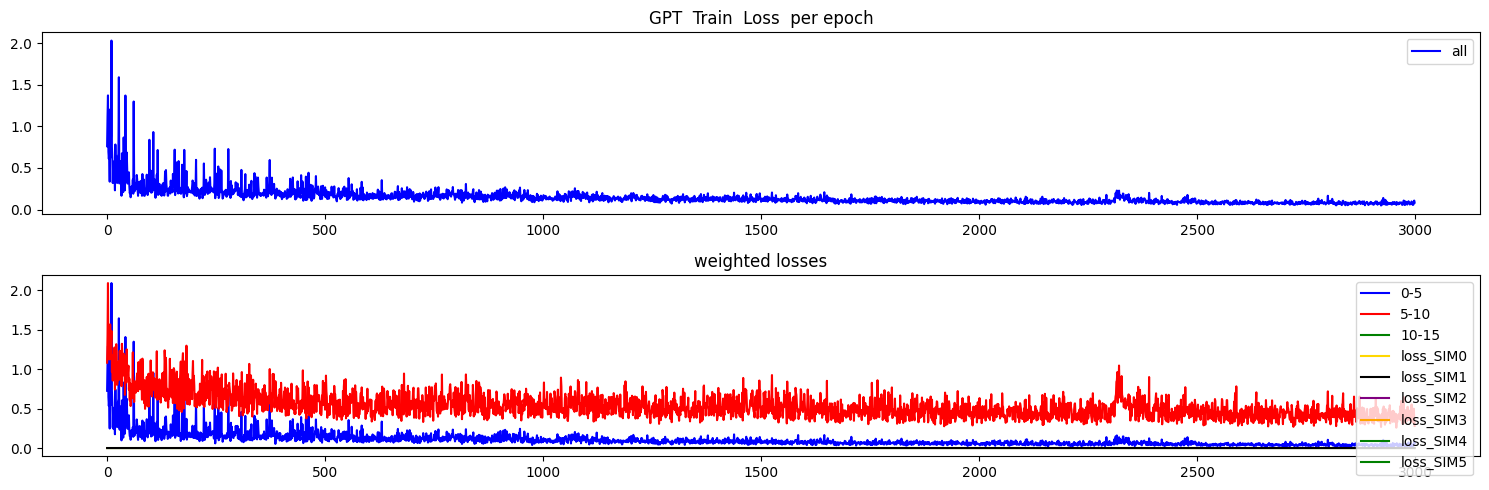

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


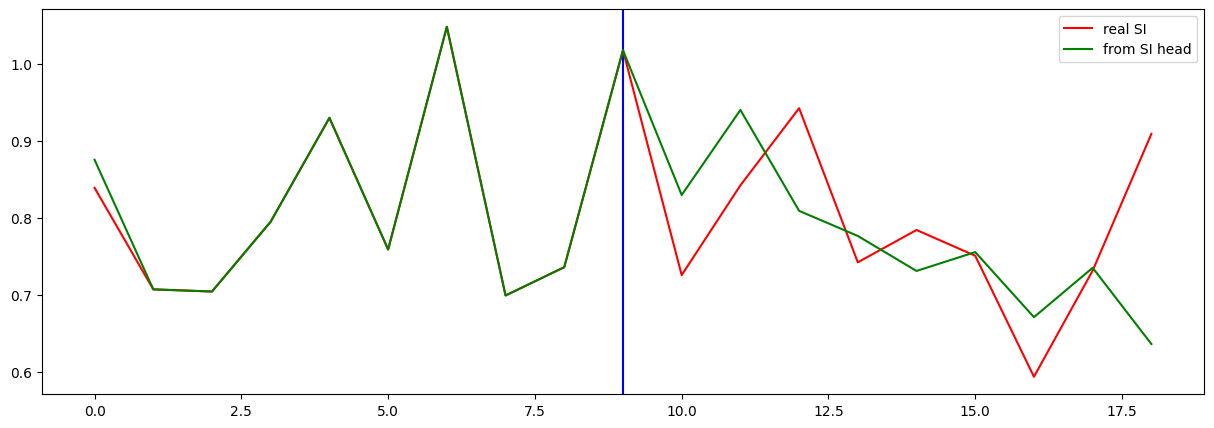

Testing R**2 - (all) - (no inputs):  0.9184982041021654
Testing R**2 - (f2) - SI full (no inputs):  -1.6345726485500247
Testing R**2 - SI head only (no inputs):  -0.20435455325568852
0 ...index R**2 (no inputs):  -0.06806559832029979
1 ...index R**2 (no inputs):  -0.6664039153209012
2 ...index R**2 (no inputs):  -1.6345726485500247
3 ...index R**2 (no inputs):  -541.006774583492
4 ...index R**2 (no inputs):  -20.988954940424875
5 ...index R**2 (no inputs):  -13.808304697427333
6 ...index R**2 (no inputs):  -139.96985592546886
7 ...index R**2 (no inputs):  -763.3504796266747
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.034103891220919724
10 ...index R**2 (no inputs):  -0.36981314195582504
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6071120479720595
16 ...index R**2 (no inputs):  -0.20339269527866377
17 ...index R**2 (no inputs):  -314161.

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.6962196642061607


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.7623240423812232


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.2259573392313442


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.4898328652921893



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -2.1297299504067913
2 .....R² on first n steps: -0.9584847100014744
3 .....R² on first n steps: -1.20786216420683
4 .....R² on first n steps: -0.933549428732594
5 .....R² on first n steps: -0.9738616040827763
6 .....R² on first n steps: -0.7665929785225536
7 .....R² on first n steps: -0.6839026648150495
8 .....R² on first n steps: -0.6573656886096251
9 .....R² on first n steps: -0.6962196642061607


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -2.697114059243452
2 .....R² on first n steps: -1.3516736947055166
3 .....R² on first n steps: -1.5678775248018568
4 .....R² on first n steps: -1.3312106036600588
5 .....R² on first n steps: -1.3033085440268182
6 .....R² on first n steps: -0.9437781223412771
7 .....R² on first n steps: -0.8397854824794893
8 .....R² on first n steps: -0.7963910077957643
9 .....R² on first n steps: -0.7623240423812232


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -2.0443604368382076
2 .....R² on first n steps: 0.036546868361380325
3 .....R² on first n steps: 0.091399848789677
4 .....R² on first n steps: 0.2038958482633113
5 .....R² on first n steps: 0.21323673710232516
6 .....R² on first n steps: 0.20234653690228788
7 .....R² on first n steps: 0.23056177342087947
8 .....R² on first n steps: 0.2501845718931164
9 .....R² on first n steps: 0.2259573392313442


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -2.8872082635224903
2 .....R² on first n steps: -1.2421095370583752
3 .....R² on first n steps: -1.2805269643854627
4 .....R² on first n steps: -0.9706438475927508
5 .....R² on first n steps: -0.9287605550919598
6 .....R² on first n steps: -0.628079657686154
7 .....R² on first n steps: -0.5056983117553233
8 .....R² on first n steps: -0.453780666199878
9 .....R² on first n steps: -0.4898328652921893



## Plot


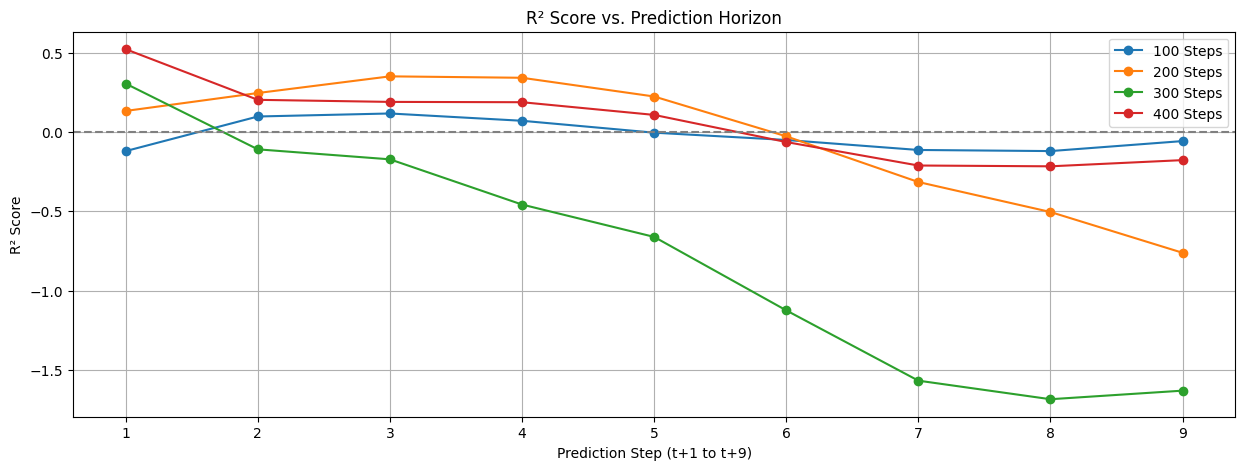

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
